# Music Streaming Wars: Song Popularity Prediction

Author: E. Berke Tezcan

<img src="./images/apple-music-spotify-tidal.jpg" style="width: 60%">

***

## TABLE OF CONTENTS

*Click to jump to matching Markdown Header.*<br><br>

- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB/EXPLORE](#SCRUB/EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

With Apple Music announcing on May 17th that they will be providing lossless audio along with spatial audio by Dolby Atmos for their subscribers and Tidal continuously providing exclusive content from artists, the competition among audio streaming platforms is heating up. Spotify would like to stay competitive by being able to predict which songs are going to be popular ahead of time so that they can curate even better playlists and sign deals with up-and-coming artists to have exclusivity on their content. This would not only help retain the current subscribers but also help market the platform to new subscribers as well.

For this project, we were hired by Spotify to develop a machine learning model that can accurately predict whether a song is going to be popular or not. In order to achieve this, we will be evaluating different machine learning models and will look at what attributes of a song are the most important for determining its popularity.

# OBTAIN

We will be using a dataset from Kaggle (https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) that contains approximately 232,000 tracks and their attributes to train several machine learning models in order to find the common threads between popular songs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/test/Spotify-Song-Popularity-Prediction-master')

In [ ]:
import pandas as pd

In [ ]:
#importing data into a dataframe
df = pd.read_csv('./data/SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
#looking at the stats of different columns
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

We once again see that we have 232,725 tracks in the dataset with both categorical and numerical columns. In order to use the information from the categorical columns ('genre', 'artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature') we will either need to represent them numerically by feature engineering or drop them to be able to train the models.

In [ ]:
#looking at different values contained within columns
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("--------------------")

Column: genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64
--------------------
Column: artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane   

There are a couple things that stand out in the value counts of the columns. First one is that we have the "Children's Music" genre showing up twice and we have duplicated values in the track_id column.

# SCRUB/EXPLORE

## Addressing "Children's Music" Character Discrepancy

In [ ]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

There are 2 types of "Children's Music" values in the genres due to the character used for apostrophe. Since both of these values are meant to show the same thing we need to merge them and achieve consistency.

In [ ]:
df.loc[df['genre']=="Children’s Music",'genre']="Children's Music"

In [ ]:
#verifying that the issue has been resolved
df['genre'].value_counts()

Children's Music    14756
Comedy               9681
Soundtrack           9646
Indie                9543
Jazz                 9441
Pop                  9386
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9232
World                9096
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8701
Country              8664
Opera                8280
Movie                7806
A Capella             119
Name: genre, dtype: int64

## Missing Values

In [ ]:
#checking for missing values
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

We don't have any missing values in our columns so we will move onto check for duplicated rows.

## Addressing Duplicated Tracks

We need to take a look and find all duplicated tracks by using their unique id numbers.

In [ ]:
df[df['track_id'].duplicated()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.07160,0.710,217813,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.700
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.370
1452,Alternative,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,56,0.77900,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.130
1554,Alternative,Steve Lacy,Some,4riDfclV7kPDT9D58FpmHd,58,0.00548,0.784,118393,0.554,0.254000,G,0.0995,-6.417,Major,0.0300,104.010,4/4,0.634
1634,Alternative,tobi lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,59,0.19000,0.736,215385,0.643,0.000000,F,0.1060,-8.636,Major,0.0461,156.002,4/4,0.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.436
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.945
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813


We have 55,951 duplicated rows that we need to address. Before we can address these duplications though we need to see what the cause of the duplicates are.

In [ ]:
#checking rows for duplicated ids to see differences
df[df['track_id']=='6iOvnACn4ChlAw4lWUU4dd']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children's Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


In [ ]:
df[df['track_id']=='2XGLdVl7lGeq8ksM6Al7jT']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
179212,Jazz,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962


In [ ]:
df[df['track_id']=='2HFczeynfKGiM9KF2z2K7K']


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
48555,Blues,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,35,0.0136,0.294,258267,0.739,0.00482,C,0.138,-7.167,Major,0.0434,176.402,4/4,0.945
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.0136,0.294,258267,0.739,0.00482,C,0.138,-7.167,Major,0.0434,176.402,4/4,0.945


We see that most of the attributes of the duplicated songs are the same except for 'popularity' and 'genre'. The 'popularity' column can be aggregated since it is a numerical column but the categorical column of 'genre' is a little bit trickier. What makes the most sense in this case would be to create different columns with the genre names and display with binary values whether a song belongs to that genre or not.

In [ ]:
#generating a list with the genre names
genre_list = list(df['genre'].unique())

In [ ]:
#creating the genre columns using the genre list
for genre in genre_list:
    df[genre] = (df['genre']==genre).astype('int')

In [ ]:
#grouping by track_id number to get rid of duplicates and keeping the maximum values in each column.
df=df.groupby(['track_id']).max()

Above, we created the genre columns and merged the duplicated values keeping the maximum value in each column. This makes sense since the track that is being listened to is the same one. For example, if a track had popularity scores of 15, 25, 38 and 42 in its duplicated rows, we are keeping the best value of 42 by taking the max.

In [ ]:
#removing redundant genre column
df.drop('genre', axis=1, inplace=True)
df.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,Capcom Sound Team,Zangief's Theme,13,0.234,0.617,169173,0.862,0.976000,G,0.1410,...,0,0,0,0,0,0,0,0,0,0
000CzNKC8PEt1yC3L8dqwV,Henri Salvador,Coeur Brisé à Prendre - Remastered,5,0.249,0.518,130653,0.805,0.000000,F,0.3330,...,0,0,0,0,0,0,0,0,0,0
000DfZJww8KiixTKuk9usJ,Mike Love,Earthlings,30,0.366,0.631,357573,0.513,0.000004,D,0.1090,...,0,1,0,0,0,0,0,0,0,0
000EWWBkYaREzsBplYjUag,Don Philippe,Fewerdolr,39,0.815,0.768,104924,0.137,0.922000,C#,0.1130,...,0,0,0,1,0,0,0,0,0,0
000xQL6tZNLJzIrtIgxqSl,ZAYN,Still Got Time,70,0.131,0.748,188491,0.627,0.000000,G,0.0852,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#verifying that duplicates have been eliminated
df[df.index =='6iOvnACn4ChlAw4lWUU4dd']

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,
6iOvnACn4ChlAw4lWUU4dd,Doja Cat,Go To Town,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,...,1,0,0,0,0,0,0,0,0,0


We successfully addressed the duplicates of each track by aggregating them to a single row.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 00021Wy6AyMbLP2tqij86e to 7zzbfi8fvHe6hm342GcNYl
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       176774 non-null  object 
 1   track_name        176774 non-null  object 
 2   popularity        176774 non-null  int64  
 3   acousticness      176774 non-null  float64
 4   danceability      176774 non-null  float64
 5   duration_ms       176774 non-null  int64  
 6   energy            176774 non-null  float64
 7   instrumentalness  176774 non-null  float64
 8   key               176774 non-null  object 
 9   liveness          176774 non-null  float64
 10  loudness          176774 non-null  float64
 11  mode              176774 non-null  object 
 12  speechiness       176774 non-null  float64
 13  tempo             176774 non-null  float64
 14  time_signature    176774 non-null  object 
 15  valence           176774 non-null  f

We now have 176,774 unique tracks in our dataset (down from 232,725).

## Feature Engineering - is_popular

Since our goal is to be able to identify which tracks will be popular, we need to feature engineer a new column by binarizing the popularity column. To be able to do this, we need to decide on a cut-off point of popularity score which if a song stays above this cut-off point it will be considered "popular" and if it stays below it will be considered "not popular". We can start off by taking a look at the distribution of the popularity score distribution.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='popularity', ylabel='Count'>

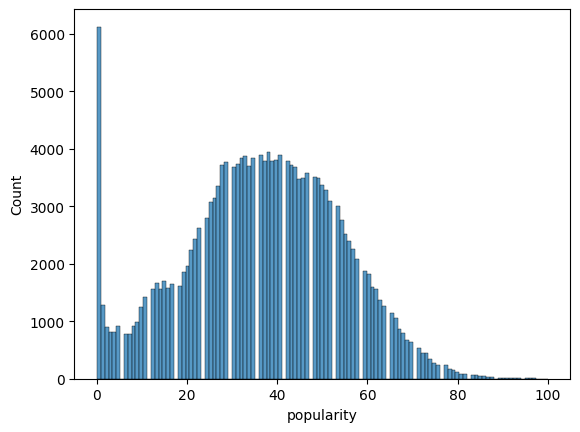

In [ ]:
#creating a histogram to see distribution of popularity scores in the dataset.
sns.histplot(df['popularity'], bins='auto')

From the above histogram we see that we have a bimodal distribution. One of the peaks is at 0, and the other one seems to be around 40. In order to better decide what's popular, we can take a look at the Top 50 songs' popularity scores (this data is also from 2019 similar to our main dataset to keep the analysis consistent.)

### Top 50 Songs - 2019

In [ ]:
#data from https://www.kaggle.com/leonardopena/top50spotify2019
df_50 = pd.read_csv('data/top50.csv', encoding='latin1', index_col=0)

In [ ]:
df_50.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
#displaying stats information of Top 50 songs
df_50['Popularity'].describe()

count    50.000000
mean     87.500000
std       4.491489
min      70.000000
25%      86.000000
50%      88.000000
75%      90.750000
max      95.000000
Name: Popularity, dtype: float64

Going back to our histogram we can draw vertical lines to see where these values fall into.

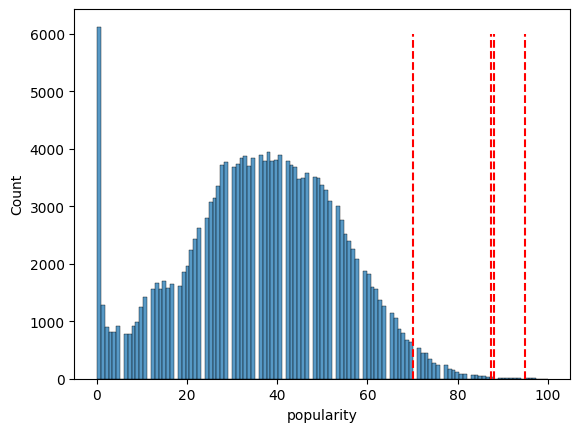

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df['popularity'], bins='auto', ax=ax)
stats=['mean', '50%', 'min', 'max']
for stat in stats:
    ax.vlines(x=df_50['Popularity'].describe()[stat], ymin=0, ymax=6000, linestyles='dashed', colors='red', label=stat)

We can see that there was a range of popularity scores in the Top 50 songs between 70 and 95. Which means that any song that is above a 70 theoretically could be a popular song. It doesn't make sense to use median or mean scores for our cutoff point in this case since then we would be disregarding all the songs that had lower values than 87.5 or 88 as unpopular which is untrue. In a previous iteration of this project, we proceeded modelling with the popularity score of 70 being the cutoff point and our models did not perform well since the cutoff point was based off of only 50 data points. Therefore we proceeded to look at a larger dataset to get a better sample size of popular songs.

### Top 100 Songs - 2019

In [ ]:
#data from https://www.kaggle.com/reach2ashish/top-100-spotify-songs-2019
df_100 = pd.read_csv('data/spotify_top_100_2019.csv')

In [ ]:
#Data from:https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019/data
df2010_2019 = pd.read_csv('data/Spotify_2010-2019_Top_100.csv')

In [ ]:
df_100['popularity '].describe()

count    100.000000
mean      72.020000
std       14.088451
min        4.000000
25%       70.000000
50%       74.500000
75%       79.000000
max       88.000000
Name: popularity , dtype: float64

In [ ]:
df2010_2019['pop'].describe()

count    1000.000000
mean       74.840000
std         8.807836
min        35.000000
25%        70.000000
50%        76.000000
75%        81.000000
max        95.000000
Name: pop, dtype: float64

The minimum value of 4 for the popularity score on the Top 100 Songs chart seems like an outlier. Next, we'll visualize the spread of this column to confirm.

<Axes: xlabel='popularity ', ylabel='Count'>

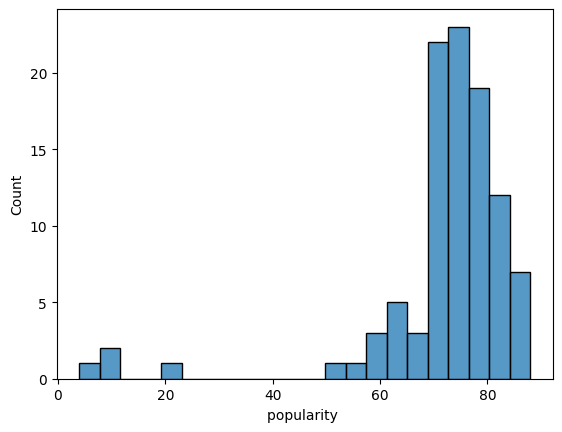

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df_100['popularity '], bins='auto', ax=ax)

<Axes: xlabel='pop', ylabel='Count'>

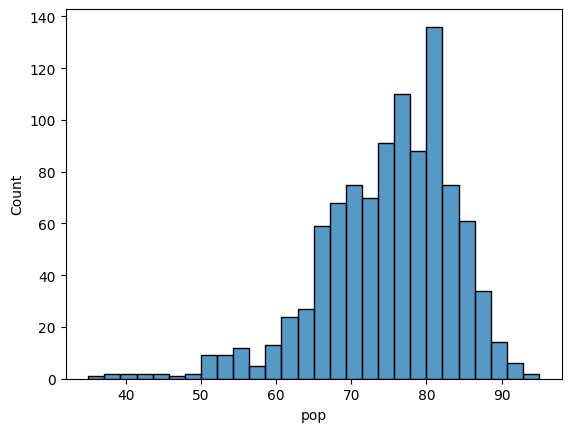

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df2010_2019['pop'], bins='auto', ax=ax)

As we imagined the scores within the range 0-25 seem like outliers. We can remove outliers from this dataset with the IQR method to get a better perspective on the data.

In [ ]:
#Outlier Removal with the IQR method

def find_outliers_IQR(data, return_limits = False):
    """Use Tukey's Method of outlier removal AKA InterQuartile-Range Rule
    and return boolean series where True indicates it is an outlier.
    - Calculates the range between the 75% and 25% quartiles
    - Outliers fall outside upper and lower limits, using a treshold of  1.5*IQR the 75% and 25% quartiles.

    IQR Range Calculation:
        res = df.describe()
        IQR = res['75%'] -  res['25%']
        lower_limit = res['25%'] - 1.5*IQR
        upper_limit = res['75%'] + 1.5*IQR

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.

    Adapted from Flatiron School Phase #2 Py Files.
    URL = https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/py_files/functions_SG.py

    """
    df_b=data
    res= df_b.describe()

    IQR = res['75%'] -  res['25%']
    lower_limit = res['25%'] - 1.5*IQR
    upper_limit = res['75%'] + 1.5*IQR

    if return_limits:
        return lower_limit, upper_limit

    else:
        idx_outs = (df_b>upper_limit) | (df_b<lower_limit)
        return idx_outs

In [ ]:
#removing outliers from the popularity column
df_100 = df_100[find_outliers_IQR(df_100['popularity '])==False]
#displaying minimum & maxium values in popularity column
print("Minimum:", df_100['popularity '].min())
print("Maximum:", df_100['popularity '].max())

Minimum: 58
Maximum: 88


In [ ]:
#removing outliers from the popularity column
df2010_2019 = df2010_2019[find_outliers_IQR(df2010_2019['pop'])==False]
#displaying minimum & maxium values in popularity column
print("Minimum:", df2010_2019['pop'].min())
print("Maximum:", df2010_2019['pop'].max())

Minimum: 54.0
Maximum: 95.0


<Axes: xlabel='popularity ', ylabel='Count'>

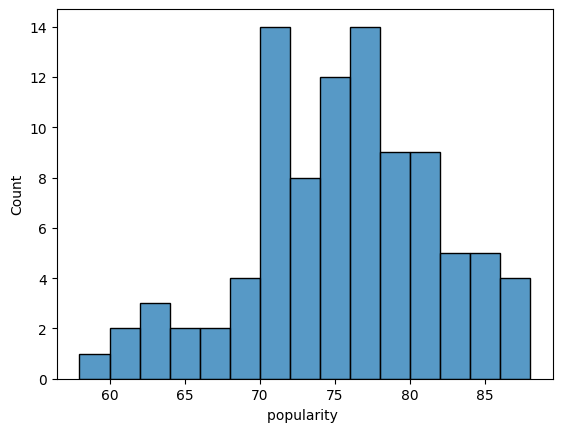

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df_100['popularity '], bins=15, ax=ax)

<Axes: xlabel='pop', ylabel='Count'>

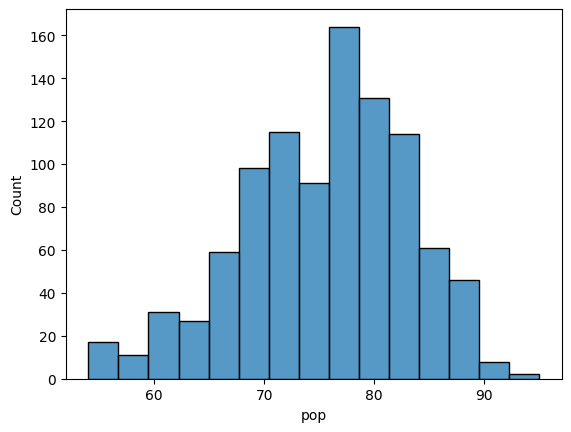

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df2010_2019['pop'], bins=15, ax=ax)

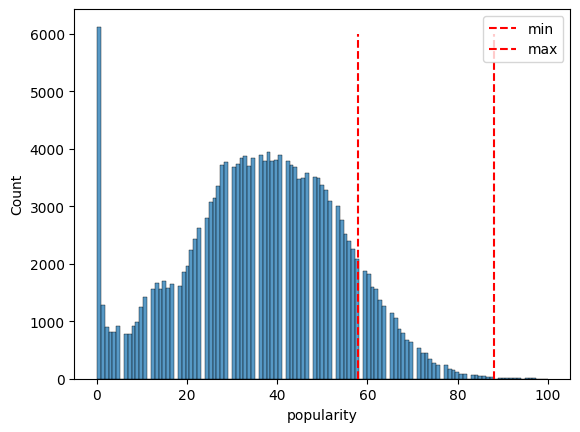

In [ ]:
#visualizing the min and max popularity scores on the overall dataset histogram
fig, ax = plt.subplots()
sns.histplot(df['popularity'], bins='auto', ax=ax)
ax.vlines(x=df_100['popularity '].min(), ymin=0, ymax=6000, linestyles='dashed', colors='red', label='min')
ax.vlines(x=df_100['popularity '].max(), ymin=0, ymax=6000, linestyles='dashed', colors='red', label='max')
plt.legend()

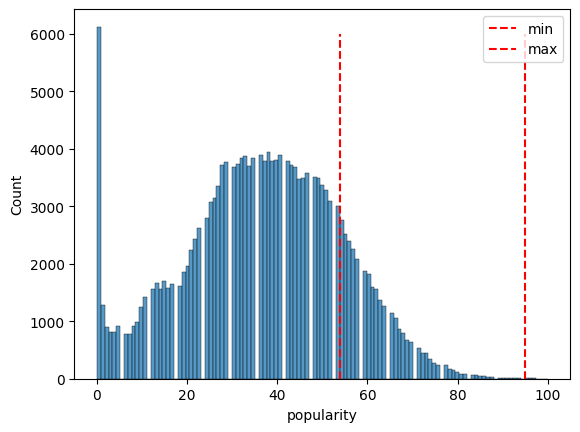

In [ ]:
#visualizing the min and max popularity scores on the overall dataset histogram
fig, ax = plt.subplots()
sns.histplot(df['popularity'], bins='auto', ax=ax)
ax.vlines(x=df2010_2019['pop'].min(), ymin=0, ymax=6000, linestyles='dashed', colors='red', label='min')
ax.vlines(x=df2010_2019['pop'].max(), ymin=0, ymax=6000, linestyles='dashed', colors='red', label='max')
plt.legend()

As we can expect to see, the top 100 songs have a wider range and therefore a lower popularity score threshold compared to the top 50 songs. We will be defining a song being popular as being Top 100 worthy and therefore will establish our cutoff point at 58.

In [ ]:
#creating is_popular column with our cutoff point

#Change to a value of 54 for 2nd run through
df['is_popular']=(df['popularity']>=54).astype('int')
df.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,is_popular
track_id,,,,,,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,Capcom Sound Team,Zangief's Theme,13,0.234,0.617,169173,0.862,0.976000,G,0.1410,...,0,0,0,0,0,0,0,0,0,0
000CzNKC8PEt1yC3L8dqwV,Henri Salvador,Coeur Brisé à Prendre - Remastered,5,0.249,0.518,130653,0.805,0.000000,F,0.3330,...,0,0,0,0,0,0,0,0,0,0
000DfZJww8KiixTKuk9usJ,Mike Love,Earthlings,30,0.366,0.631,357573,0.513,0.000004,D,0.1090,...,1,0,0,0,0,0,0,0,0,0
000EWWBkYaREzsBplYjUag,Don Philippe,Fewerdolr,39,0.815,0.768,104924,0.137,0.922000,C#,0.1130,...,0,0,1,0,0,0,0,0,0,0
000xQL6tZNLJzIrtIgxqSl,ZAYN,Still Got Time,70,0.131,0.748,188491,0.627,0.000000,G,0.0852,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#dropping popularity score column since we will not be using it
df.drop(['popularity', 'artist_name', 'track_name'], axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,is_popular
track_id,,,,,,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,0.234,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,0.0514,...,0,0,0,0,0,0,0,0,0,0
000CzNKC8PEt1yC3L8dqwV,0.249,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,0.0407,...,0,0,0,0,0,0,0,0,0,0
000DfZJww8KiixTKuk9usJ,0.366,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,0.0293,...,1,0,0,0,0,0,0,0,0,0
000EWWBkYaREzsBplYjUag,0.815,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,0.0747,...,0,0,1,0,0,0,0,0,0,0
000xQL6tZNLJzIrtIgxqSl,0.131,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,...,0,0,0,0,0,0,0,0,0,1


We dropped popularity scores since we already binarized that column, but additionally we are dropping 'artist_name' and 'track_name' since we are looking at the anatomy of a song and not who sings it or what it's called. The goal is to identify songs that will become popular without being affected by the artist's name since we would also like to find songs from up-and-coming artists.

## train_test_split

In [ ]:
#splitting the data to training and test sets in order to be able to measure performance
from sklearn.model_selection import train_test_split
y=df['is_popular']
X=df.drop('is_popular',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=432)

## One Hot Encoding the Categorical Columns

We still have categorical columns that need one hot encoding. Namely, these columns are 'key', 'mode' and 'time_signature'.

In [ ]:
#Check to see how many more columns we will be creating by OHE the cat_cols.
df.nunique()

acousticness         4734
danceability         1295
duration_ms         70749
energy               2517
instrumentalness     5400
key                    12
liveness             1732
loudness            27923
mode                    2
speechiness          1641
tempo               78509
time_signature          5
valence              1692
Movie                   2
R&B                     2
A Capella               2
Alternative             2
Country                 2
Dance                   2
Electronic              2
Anime                   2
Folk                    2
Blues                   2
Opera                   2
Hip-Hop                 2
Children's Music        2
Rap                     2
Indie                   2
Classical               2
Pop                     2
Reggae                  2
Reggaeton               2
Jazz                    2
Rock                    2
Ska                     2
Comedy                  2
Soul                    2
Soundtrack              2
World       

We will be creating 2 (mode) + 5 (time_signature) + key (12) - 3 (drop_first) = 16 columns.

In [ ]:
#define categorical columns
cat_cols = ['key', 'mode', 'time_signature']

In [ ]:
#One hot encoding the dataframes
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False, drop='first')
#Training set
data_ohe_train = encoder.fit_transform(X_train[cat_cols])
df_ohe_train = pd.DataFrame(data_ohe_train, columns=encoder.get_feature_names_out(cat_cols), index=X_train.index)

#Testing set
data_ohe_test = encoder.transform(X_test[cat_cols])
df_ohe_test = pd.DataFrame(data_ohe_test, columns=encoder.get_feature_names_out(cat_cols), index=X_test.index)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
pd.set_option("display.max_columns", None)
df_ohe_train

,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
track_id,,,,,,,,,,,,,,,,
30A3vEsySPkeXzXeMITvwE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
24OqdtijU1mbtv1qINaLi7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0UEOu38qsODKShCCl73Wpd,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6V0jVn35wT1zGMpu0wxnQ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4orZ8nXNp9I3F3wB0mlSNH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4G90H4nUlv2LxbceqpklAN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4upw9RT8Cs96EQhCuoNryV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2gOyFVMo9QV6htrKEsIDAe,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#merging OHE columns with numerical columns
X_train = pd.concat([X_train.drop(cat_cols, axis=1), df_ohe_train], axis=1)
X_test = pd.concat([X_test.drop(cat_cols, axis=1), df_ohe_test], axis=1)
X_train.tail()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children's Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4G90H4nUlv2LxbceqpklAN,0.024100,0.700,256760,0.804,0.0000,0.0633,-4.892,0.1290,184.332,0.843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4upw9RT8Cs96EQhCuoNryV,0.005460,0.565,186559,0.762,0.1690,0.6230,-7.713,0.0309,99.932,0.630,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2gOyFVMo9QV6htrKEsIDAe,0.915000,0.416,172973,0.399,0.0328,0.3880,-17.876,0.3380,133.662,0.319,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2uoDx7Jt3xiqY9gzOPEcz8,0.128000,0.901,321773,0.417,0.7190,0.1050,-9.064,0.0737,116.976,0.505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6dmVihM3kpadnkfdFGVgAc,0.000191,0.484,233039,0.834,0.1530,0.4420,-4.877,0.0727,110.103,0.142,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#concatenating all parts of our data for future reference (see Data Visualizations section)
df_ohe_x = pd.concat([X_train, X_test])
df_ohe_y = pd.concat([y_train, y_test])
df_ohe = pd.concat([df_ohe_x, df_ohe_y], axis=1)

With both the X_train and X_test dataframes scrubbed and one hot encoded we can move onto the modelling process.

# MODEL

The first model we will be generating is a dummy classifier. We will be comparing our models' success to each other but also to this baseline model.

## Model #1 - Baseline - Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(random_state=432)
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)

We need a function that will show us the classification report, the confusion matrix as well as the ROC curve to be able to evaluate our models.

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

def classification(y_true, y_pred, X, clf):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality.

    y_true: Correct y values, typically y_test that comes from the train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X: X_test values"""

    #Classification report
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))

    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

    #Plotting the normalized confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, X, y_true)

    #Plotting the ROC curve
    RocCurveDisplay.from_estimator(clf, X, y_true)

    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     43983
           1       0.00      0.00      0.00      9050

    accuracy                           0.83     53033
   macro avg       0.41      0.50      0.45     53033
weighted avg       0.69      0.83      0.75     53033



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


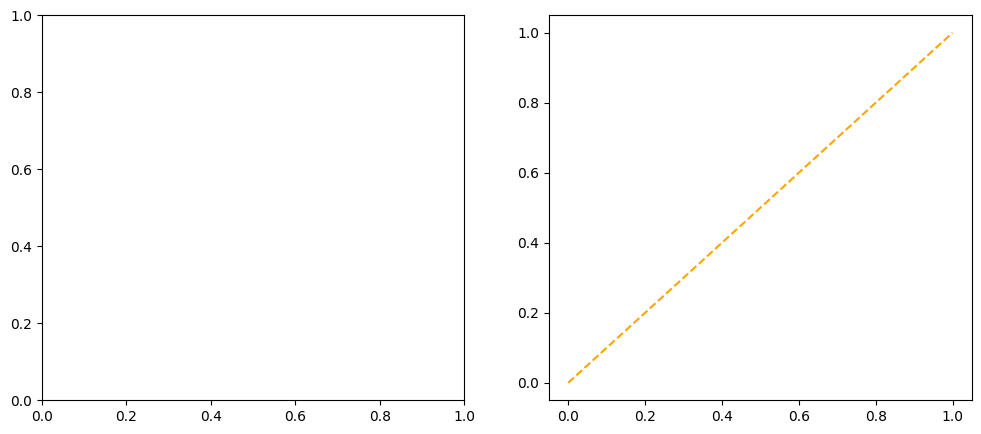

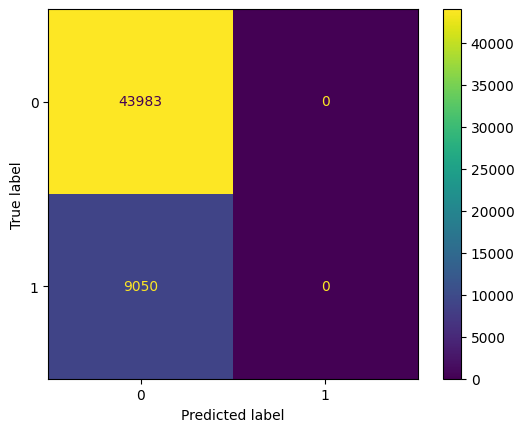

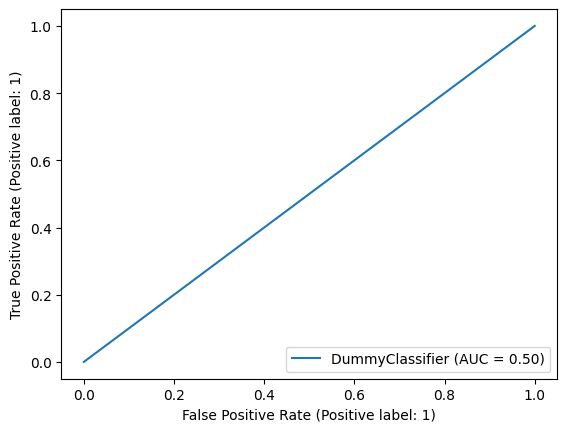

In [ ]:
classification(y_test, y_pred, X_test, clf_dummy)

In [ ]:
#class imbalance percentages
y_train.value_counts(normalize=True)

0    0.829806
1    0.170194
Name: is_popular, dtype: float64

Our dummy classifier correctly predicted 89% of the unpopular songs as unpopular; however, it correctly predicted only 11% of the popular songs as popular and instead classified 89% of them as unpopular as well. We clearly have a class imbalance problem where approximately 89% of our data is not popular and only about 11% of it is. To address this we can SMOTE the training data and see if training a model with this method would improve our results.

## Addressing Class Imbalance with SMOTENC

In [ ]:
#looking at column names to extract categorical column indices for SMOTENC
X_train.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'Movie', 'R&B', 'A Capella', 'Alternative', 'Country',
       'Dance', 'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children's Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4'],
      dtype='object')

In [ ]:
#creating a list of categorical column indices
cat_cols = list(range(10, len(X_train.columns)))
X_train.columns[cat_cols]

Index(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children's Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4'],
      dtype='object')

In [ ]:
#Using SMOTENC to address class imbalance. We are not using SMOTE since we have categorical columns. This can take 24+ minutes to run be PATIENT
from imblearn.over_sampling import SMOTE, SMOTENC

sm = SMOTENC(categorical_features=cat_cols, random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_popular, dtype: float64

Now that we addressed our class imbalance problem, we can look at the performance of the dummy classifier model once again to use as our baseline.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     43983
           1       0.00      0.00      0.00      9050

    accuracy                           0.83     53033
   macro avg       0.41      0.50      0.45     53033
weighted avg       0.69      0.83      0.75     53033



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


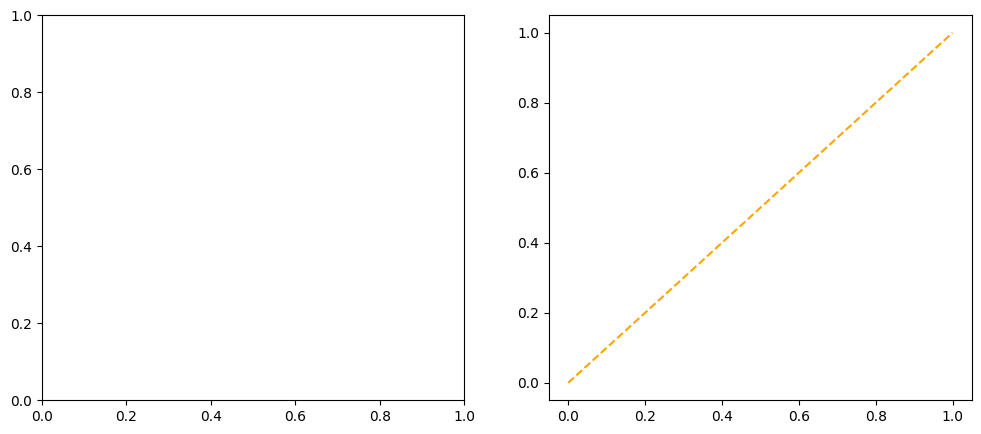

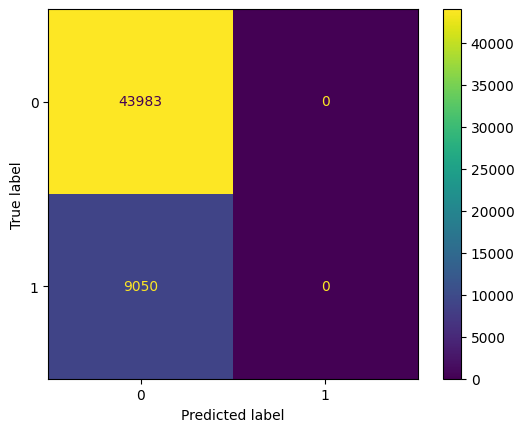

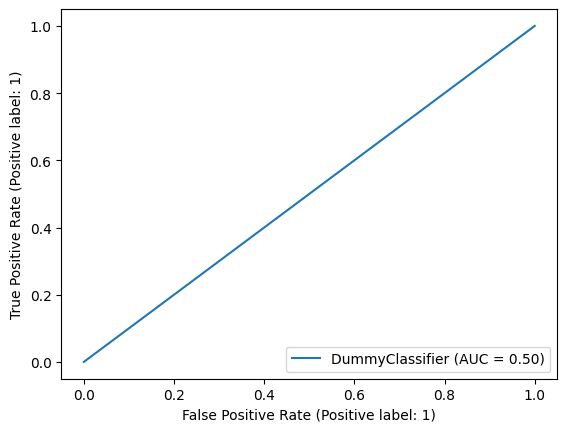

In [ ]:
#fitting Dummy Classifier to data without the class imbalance problem to serve as a true baseline
clf_dummy_sm = DummyClassifier(random_state=42)
clf_dummy_sm.fit(X_train_sm, y_train_sm)
y_pred = clf_dummy_sm.predict(X_test)
classification(y_test, y_pred, X_test, clf_dummy_sm)

We see here that the dummy classifier is essentially flipping a coin and guessing whether a song is popular or not which is not very useful. However, this serves as a great baseline for our other models to be evaluated against. We can now initialize a results dataframe and keep track of the recall scores of our models for comparison later.

In [ ]:
from sklearn.metrics import recall_score

df_results = pd.DataFrame(columns=['Model Name', 'Recall Score'])

def add_results(model_name, df):
    df = df.append({'Model Name': model_name,
                                    'Recall Score': round(recall_score(y_test, y_pred),2)},
                                   ignore_index=True)
    return df

In [ ]:
df_results = add_results('Dummy Classifier', df_results)
df_results.head()

<ipython-input-58-bb8531220e45>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Model Name': model_name,


,Model Name,Recall Score
0,Dummy Classifier,0.0


## Model #2 - Random Forest Classifier

The first model we will be developing is the Random Forest classifier.

### Initial Model

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     43983
           1       0.79      0.68      0.73      9050

    accuracy                           0.91     53033
   macro avg       0.86      0.82      0.84     53033
weighted avg       0.91      0.91      0.91     53033



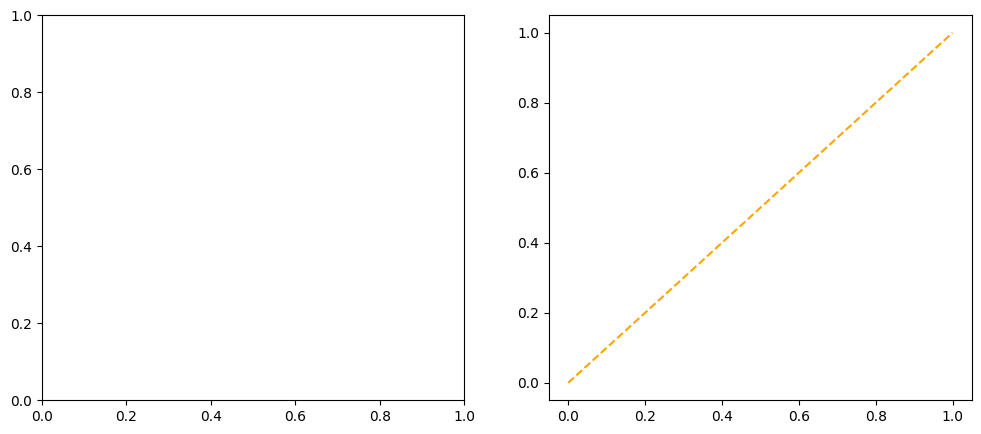

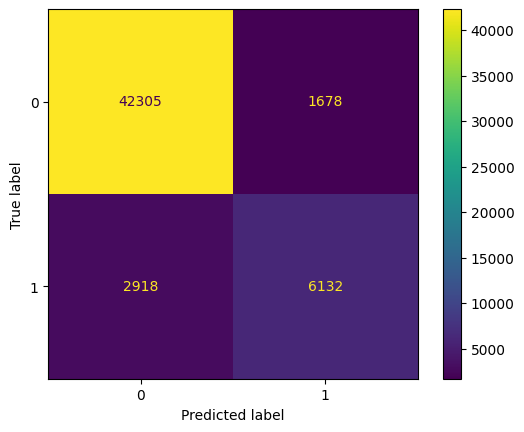

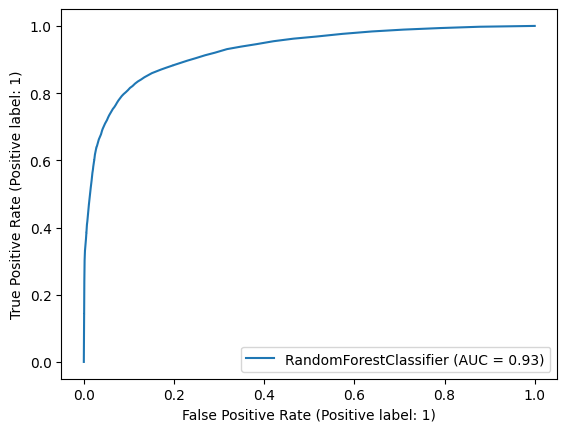

In [ ]:
#Fitting RF Classifier to SMOTE'd data
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_sm, y_train_sm)

#Making predictions and evaluation.
y_pred = clf_rf.predict(X_test)
classification(y_test, y_pred, X_test, clf_rf)

Our Random Forest model performs 48% better than the baseline classifier in predicting unpopular songs correctly and 8% better in predicting popular songs. The model may be overfitting, so to confirm we will look at the performance of the model with the training data.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102681
           1       1.00      1.00      1.00    102681

    accuracy                           1.00    205362
   macro avg       1.00      1.00      1.00    205362
weighted avg       1.00      1.00      1.00    205362



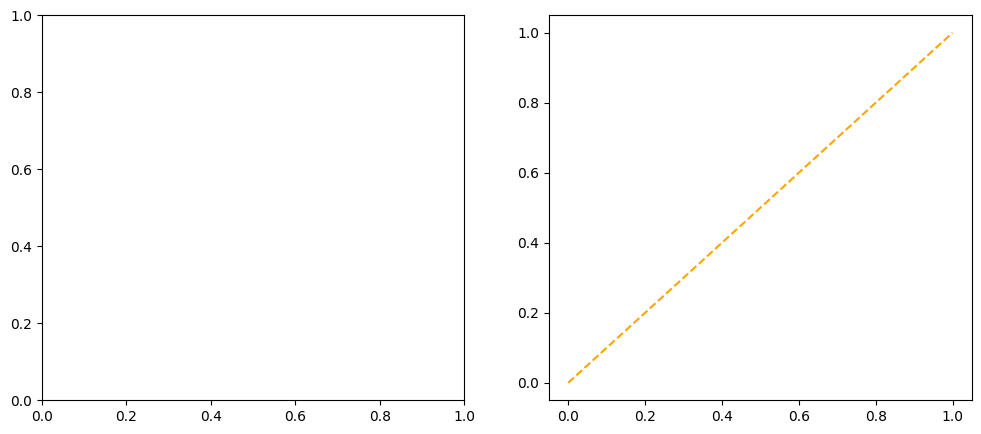

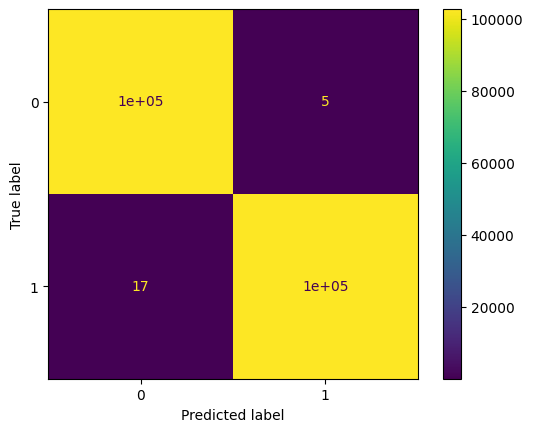

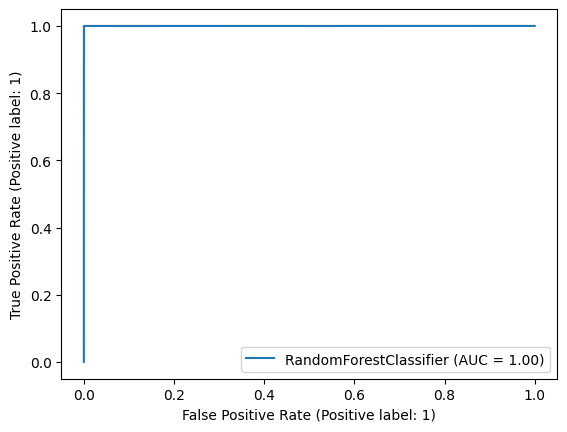

In [ ]:
#Evaluating the model performance for the training data
y_pred = clf_rf.predict(X_train_sm)
classification(y_train_sm, y_pred, X_train_sm, clf_rf)

Our model is performing perfectly on the training data but not so much on the test data since it is overfitting to the training set. We need to tune our model to get more accurate results on unseen data. We will be using a grid search to optimize for the recall score. We are optimizing recall instead of other scores since we primarily care about correctly identifying a song that will be popular and we don't mind it if we pick a few songs that don't end up becoming popular.

### Hyperparameter Tuning

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     43983
           1       0.78      0.68      0.73      9050

    accuracy                           0.91     53033
   macro avg       0.86      0.82      0.84     53033
weighted avg       0.91      0.91      0.91     53033



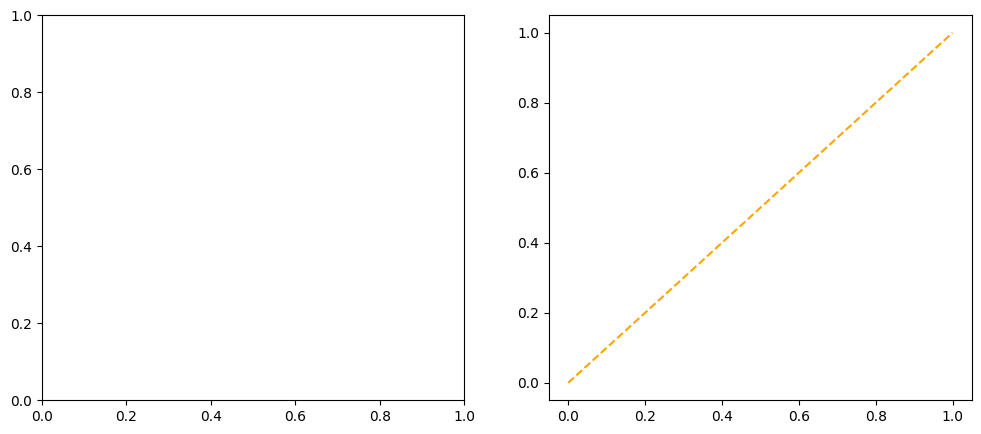

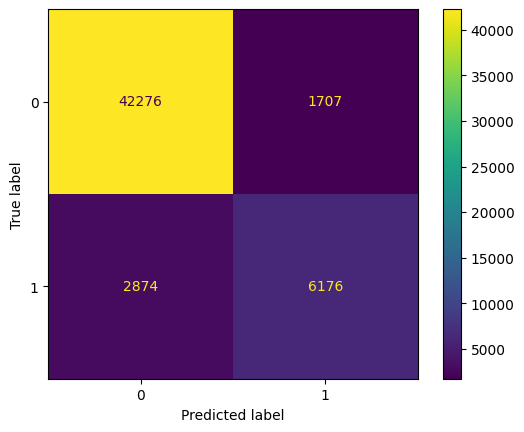

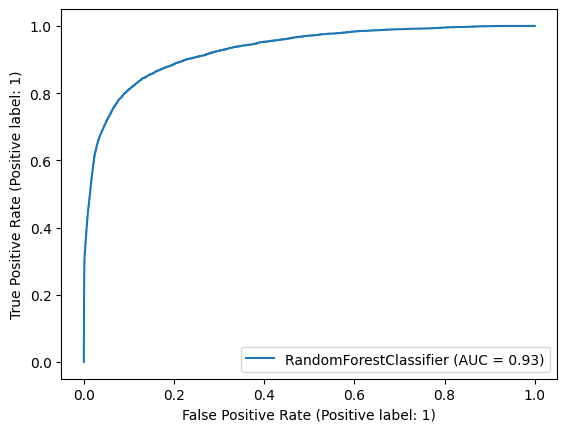

In [ ]:
clf_rf_tuned = RandomForestClassifier(criterion='entropy', max_depth=None,
                                      min_samples_leaf=2, class_weight='balanced',
                                      random_state=42)
clf_rf_tuned.fit(X_train_sm, y_train_sm)

y_pred = clf_rf_tuned.predict(X_test)
classification(y_test, y_pred, X_test, clf_rf_tuned)

Tuning the hyperparameters of our model improved the recall score for predicting popular songs by 1%. We can proceed with trying additional types of models to see if the recall score improves.

In [63]:
#appending the recall score to the results dataframe
df_results = add_results('Random Forest', df_results)
df_results.head()

<ipython-input-58-bb8531220e45>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Model Name': model_name,


,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.68


## Model #3 - XGBoost

### Initial Model

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     43983
           1       0.73      0.71      0.72      9050

    accuracy                           0.91     53033
   macro avg       0.84      0.83      0.83     53033
weighted avg       0.90      0.91      0.91     53033



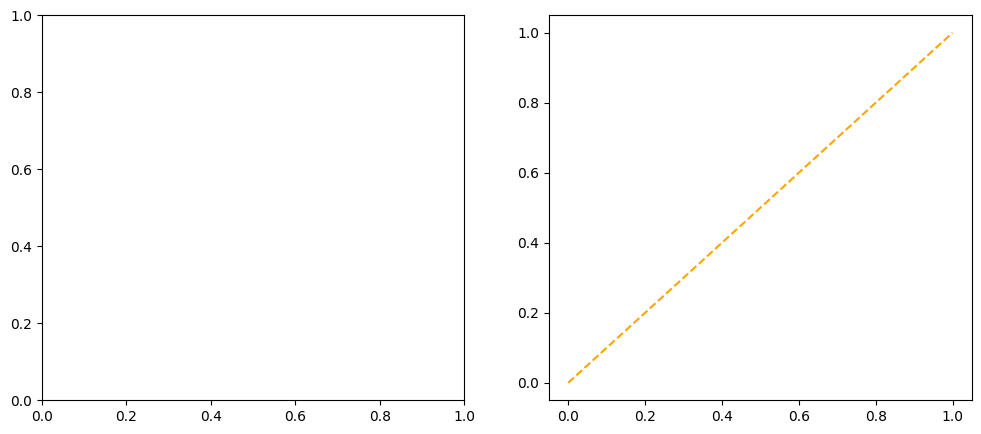

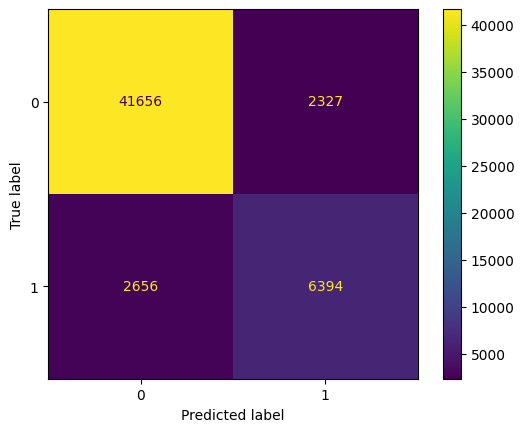

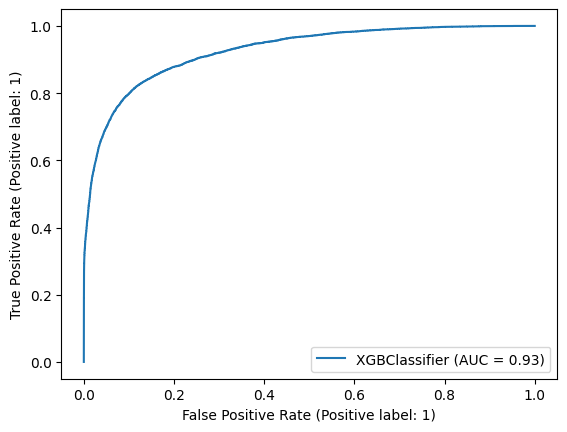

In [64]:
#Fitting XGBoost classifier to training data and evaluating results
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=42)
clf_xgb.fit(X_train_sm, y_train_sm)
y_pred = clf_xgb.predict(X_test)
classification(y_test, y_pred, X_test, clf_xgb)

The XGBoost model performed 13% better than the baseline model and 4% better than the random forest model in predicting popular songs right out of the box. We can see how it performs on the training data to see whether it is overfitting and try to tune it if it is.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95    102681
           1       0.95      0.94      0.95    102681

    accuracy                           0.95    205362
   macro avg       0.95      0.95      0.95    205362
weighted avg       0.95      0.95      0.95    205362



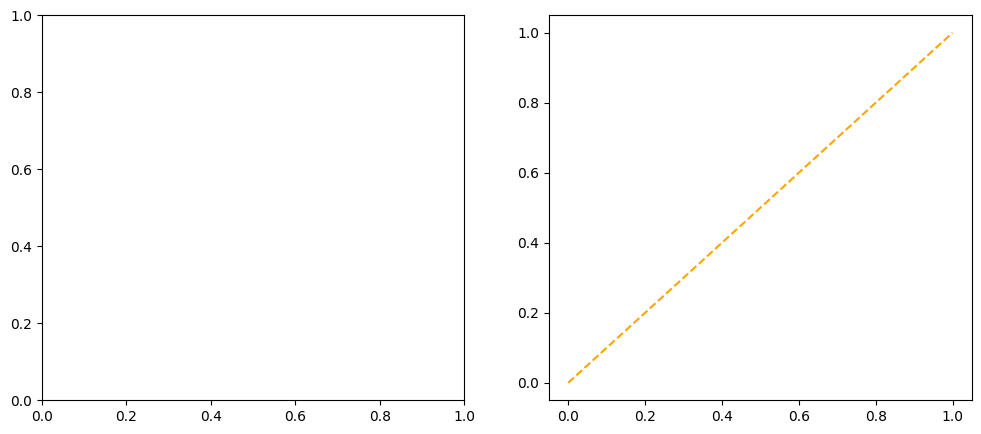

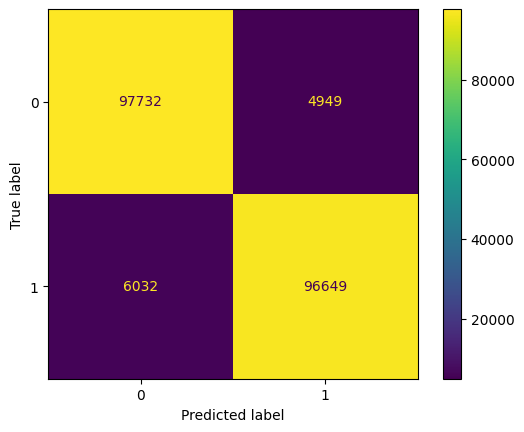

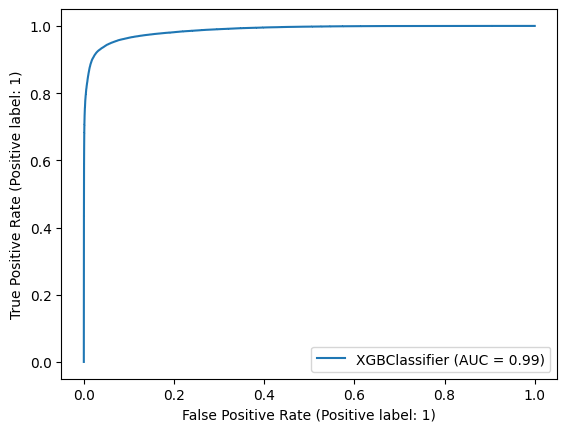

In [65]:
#Evaluating the model performance for the training data
y_pred = clf_xgb.predict(X_train_sm)
classification(y_train_sm, y_pred, X_train_sm, clf_xgb)

Once again, we see here that our model is overfitting the training data. We can run another gridsearch and tune our model to see if the recall score can be improved.

### Hyperparameter Tuning

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     43983
           1       0.72      0.72      0.72      9050

    accuracy                           0.91     53033
   macro avg       0.83      0.83      0.83     53033
weighted avg       0.91      0.91      0.91     53033



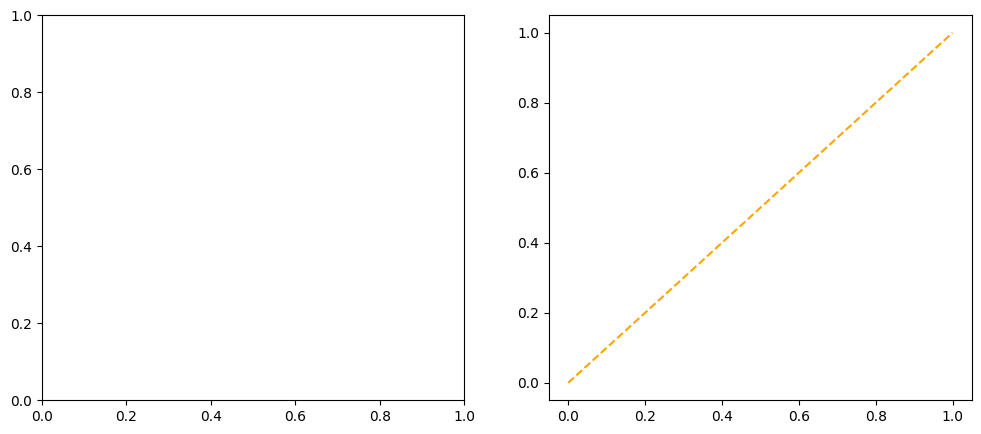

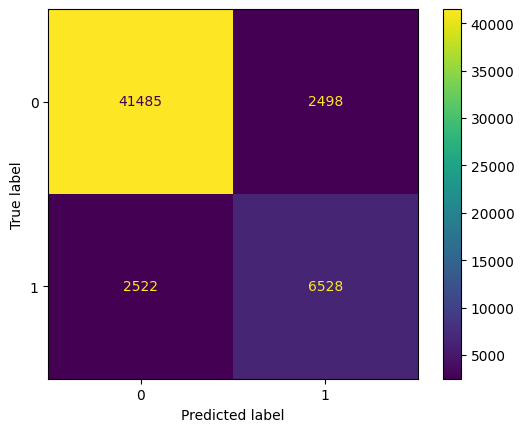

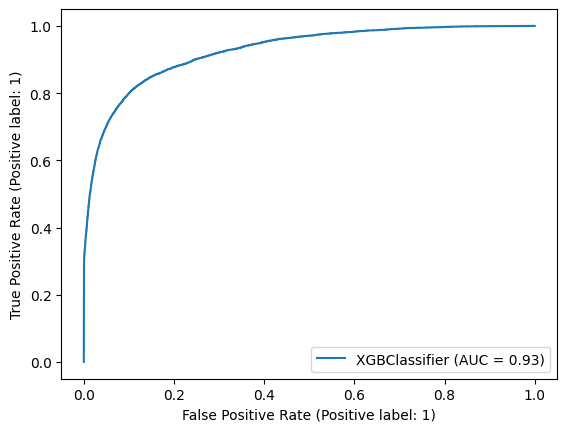

In [66]:
clf_xgb_tuned = XGBClassifier(learning_rate=0.1, max_depth=10,
                              random_state=42)
clf_xgb_tuned.fit(X_train_sm, y_train_sm)
y_pred = clf_xgb_tuned.predict(X_test)
classification(y_test, y_pred, X_test, clf_xgb_tuned)

Tuning our model has led to an increase of performance in our recall score by 1%, so we are performing 14% better compared to our baseline Dummy Classifier model and 5% better than our tuned Random Forest model. Next we will try a logistic regression model.

In [67]:
#appending the recall score to the results dataframe
df_results = add_results('XGBoost', df_results)
df_results.head()

<ipython-input-58-bb8531220e45>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Model Name': model_name,


,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.68
2,XGBoost,0.72


## Model #4 - LogisticRegressionCV

Since the Logistic Regression models are potentially sensitive to outliers and need scaled data we will need to process our data one more time to remove outliers and scale it.

### Removing Outliers

In [68]:
#separating out the numerical columns for outlier removal
num_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
num_cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [69]:
#Concatenating the training and testing sets together for outlier removal
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [70]:
#finding and removing outliers based on X_train (df_train) to avoid data leakage

original_length_train = len(df_train)
original_length_test = len(df_test)

for col in num_cols:

    lower_limit, upper_limit = find_outliers_IQR(df_train[col], return_limits=True)

    df_train = df_train[(df_train[col]>lower_limit) & (df_train[col]<upper_limit)]
    df_test = df_test[(df_test[col]>lower_limit) & (df_test[col]<upper_limit)]

print(f'{original_length_train - len(df_train)} outliers removed from training set')
print(f'{original_length_test - len(df_test)} outliers removed from test set')

55503 outliers removed from training set
23687 outliers removed from test set


In [71]:
#Separating out the X and y values for training and test sets

y_train = df_train['is_popular']
X_train = df_train.drop('is_popular', axis=1)

y_test = df_test['is_popular']
X_test = df_test.drop('is_popular', axis=1)

### Addressing Class Imbalance with SMOTENC

In [72]:
y_train.value_counts(normalize=True)

0    0.769938
1    0.230062
Name: is_popular, dtype: float64

Once again our data has a class imbalance issue so we will be using SMOTENC to address this.

In [73]:
X_train.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'Movie', 'R&B', 'A Capella', 'Alternative', 'Country',
       'Dance', 'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children's Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4'],
      dtype='object')

In [74]:
cat_cols = list(range(10,len(X_train.columns)))
cat_cols

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [75]:
sm = SMOTENC(categorical_features=cat_cols, random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: is_popular, dtype: float64

### Scaling the Data

In [76]:
#Using Standard Scaler to scale the smote'd data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sm_sc = scaler.fit_transform(X_train_sm)
X_test_sc = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     22573
           1       0.69      0.70      0.70      6773

    accuracy                           0.86     29346
   macro avg       0.80      0.80      0.80     29346
weighted avg       0.86      0.86      0.86     29346



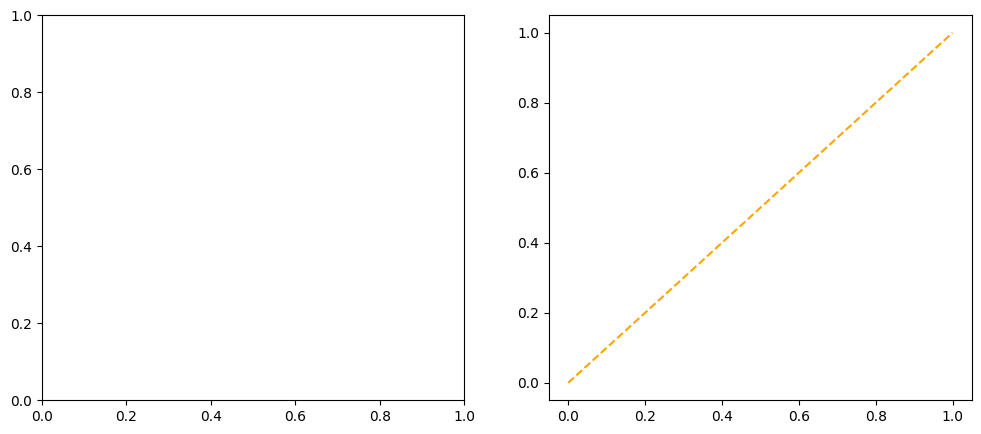

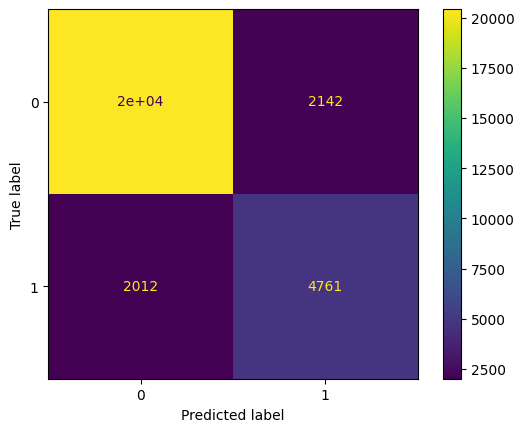

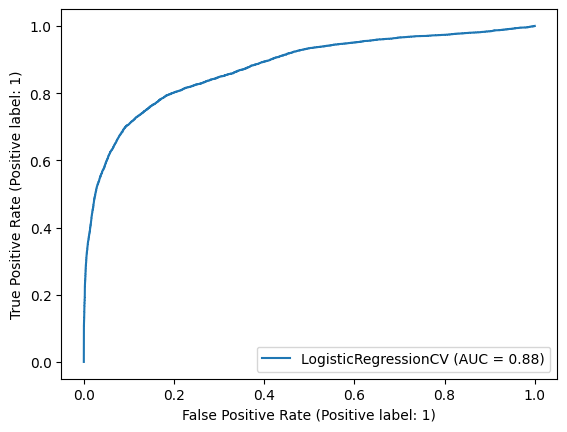

In [77]:
from sklearn.linear_model import LogisticRegressionCV
clf_logregcv = LogisticRegressionCV(cv=5, random_state=42)
clf_logregcv.fit(X_train_sm_sc,  y_train_sm)
y_pred = clf_logregcv.predict(X_test_sc)
classification(y_test, y_pred, X_test_sc, clf_logregcv)

The logistic regression model has 1% better performance compared to our tuned XGBoost model for predicting popular songs while the recall score for predicting unpopular songs is 4% lower. Once again, we will check to see if the model is overfitting and tune the model if it is.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     52539
           1       0.90      0.90      0.90     52539

    accuracy                           0.90    105078
   macro avg       0.90      0.90      0.90    105078
weighted avg       0.90      0.90      0.90    105078



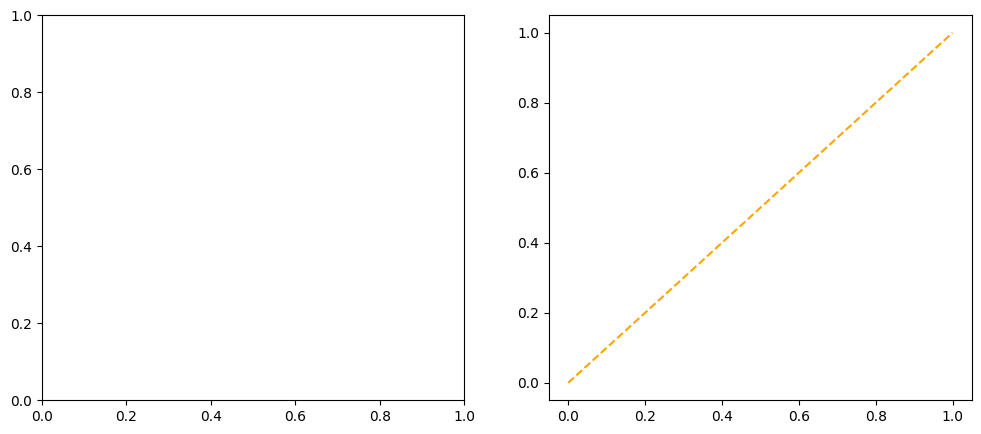

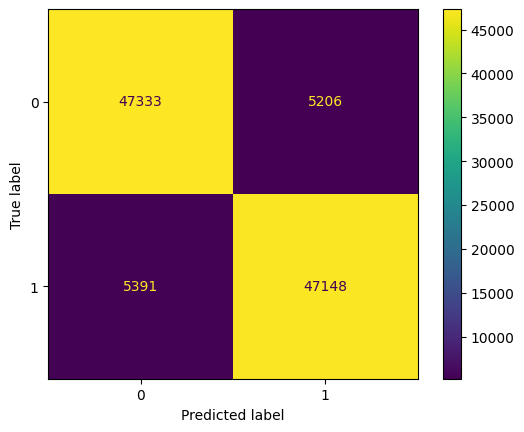

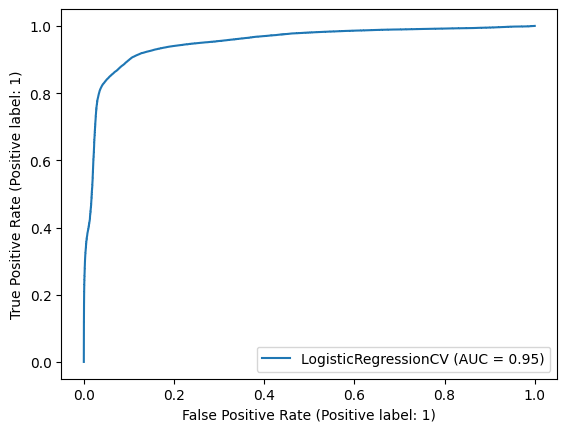

In [78]:
#Evaluating the model performance for the training data
y_pred = clf_logregcv.predict(X_train_sm_sc)
classification(y_train_sm, y_pred, X_train_sm_sc, clf_logregcv)

Our model is once again overfitting to the training data and performing very well on it but the model's performance drops significantly when we test it with the test data. In order to address this, we can once again perform a grid search and try to tune the model.

### Hyperparameter Tuning

The grid search returned 'l2' as the regularization method which is the Ridge regularization as well as a C value of 1. We will use these parameters on a new model to see if the recall score improves.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     22573
           1       0.69      0.70      0.70      6773

    accuracy                           0.86     29346
   macro avg       0.80      0.80      0.80     29346
weighted avg       0.86      0.86      0.86     29346



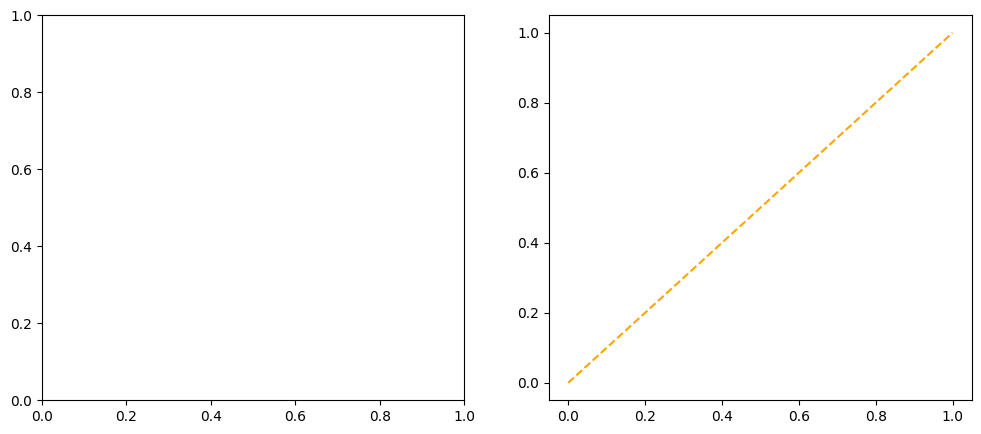

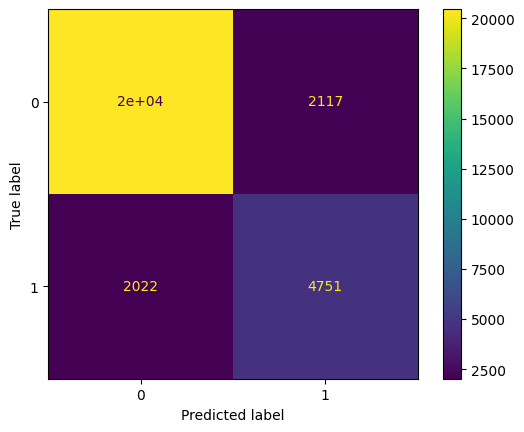

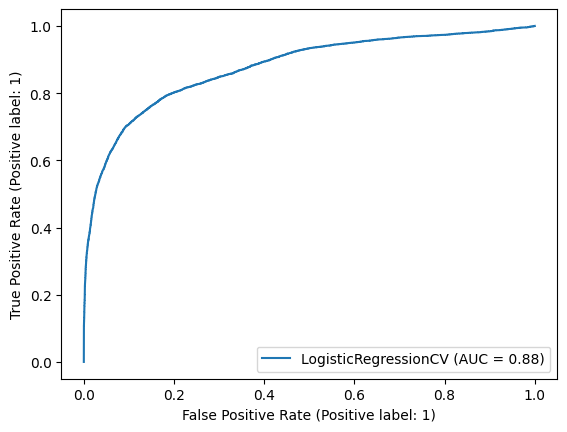

In [79]:
clf_logregcv_tuned = LogisticRegressionCV(cv=5, class_weight='balanced', Cs=1,
                                          penalty='l2', solver='liblinear',
                                          random_state=42)
clf_logregcv_tuned.fit(X_train_sm_sc,  y_train_sm)
y_pred = clf_logregcv_tuned.predict(X_test_sc)
classification(y_test, y_pred, X_test_sc, clf_logregcv_tuned)

Unfortunately, the parameters returned by our grid search did not seem to improve the recall score. This can potentially be due to the limitation of the model itself or more likely is the limitations of our dataset. We simply may not have enough information in the data to more accurately predict the popularity of a song.

In [80]:
#appending the recall score to the results dataframe
df_results = add_results('Logistic Regression', df_results)
df_results.head()

<ipython-input-58-bb8531220e45>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Model Name': model_name,


,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.68
2,XGBoost,0.72
3,Logistic Regression,0.70


# **Model #5 - Linear Regression**

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

# Evaluate on the test set using regression metrics
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate on the training set using regression metrics (if needed)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'Test Set - Mean Squared Error: {mse_test}')
print(f'Test Set - R-squared: {r2_test}')

Test Set - Mean Squared Error: 0.08884219709591377
Test Set - R-squared: 0.4995660564190427


In [ ]:
#Hard to compare/add results for a linear regression model as it isn't evaluated in a similar mannerism of recalls scores and such. But, the MSE score of 0.08 is a very strong score with R-squared of 0.499 instead of 0.99 due
#to data being binary in nature.

# **Model 6 - Stochastic Gradient Descent**

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22573
           1       0.23      1.00      0.38      6773

    accuracy                           0.23     29346
   macro avg       0.12      0.50      0.19     29346
weighted avg       0.05      0.23      0.09     29346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


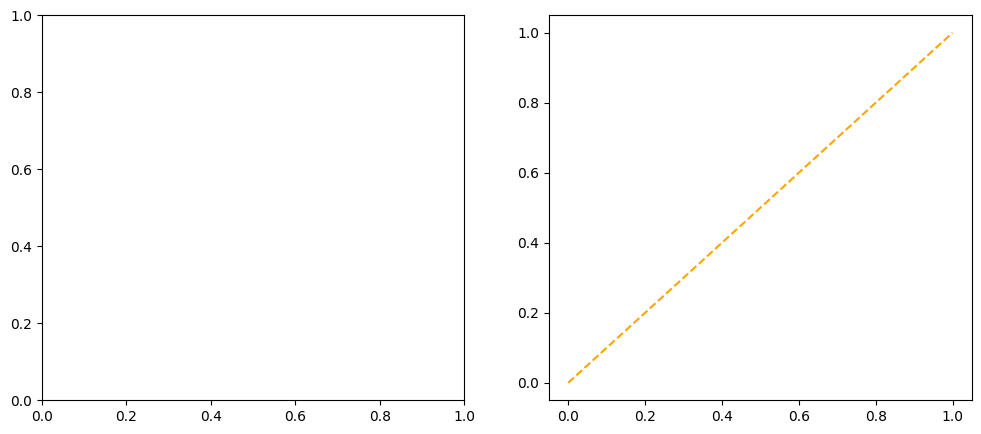

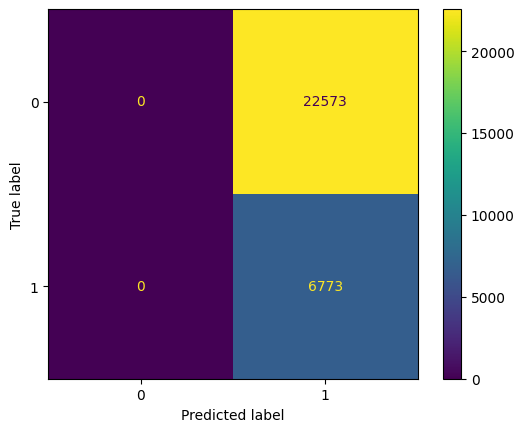

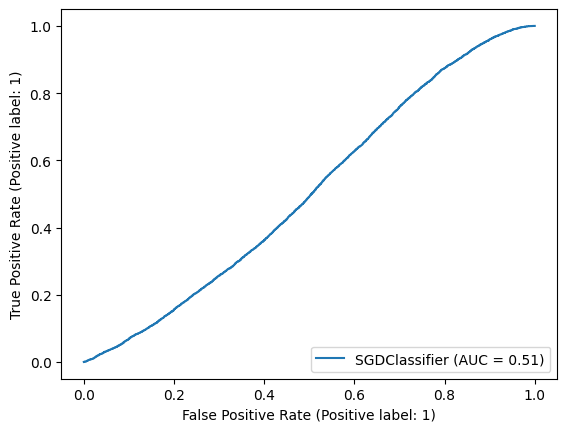

In [82]:
from sklearn.linear_model import SGDClassifier

# Fitting SGDClassifier to training data and evaluating results
sgd_classifier = SGDClassifier( random_state=42, class_weight='balanced')
sgd_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_sgd = sgd_classifier.predict(X_test)
y_pred_train_sgd = sgd_classifier.predict(X_train)

# Evaluate on the test set using classification metrics
classification(y_test, y_pred_test_sgd, X_test, sgd_classifier)


In [83]:
#Only run for hyperparamaters sakes, takes about 50 minutes

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Create an SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'loss': ['hinge', 'log'],  # You can try other loss functions
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet'],  # Penalty term
    'max_iter': [1000, 2000],  # Maximum number of iterations
}

# Create the GridSearchCV object
grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_sgd_classifier = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_test_best = best_sgd_classifier.predict(X_test)

# Evaluate on the test set using classification metrics
accuracy_best = accuracy_score(y_test, y_pred_test_best)
precision_best = precision_score(y_test, y_pred_test_best)
recall_best = recall_score(y_test, y_pred_test_best)
f1_best = f1_score(y_test, y_pred_test_best)

# Print or store the classification metrics for the best model
print(f'Best Model - Accuracy: {accuracy_best}')
print(f'Best Model - Precision: {precision_best}')
print(f'Best Model - Recall: {recall_best}')
print(f'Best Model - F1 Score: {f1_best}')

KeyboardInterrupt: ignored

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     22573
           1       0.71      0.64      0.67      6773

    accuracy                           0.86     29346
   macro avg       0.80      0.78      0.79     29346
weighted avg       0.85      0.86      0.85     29346



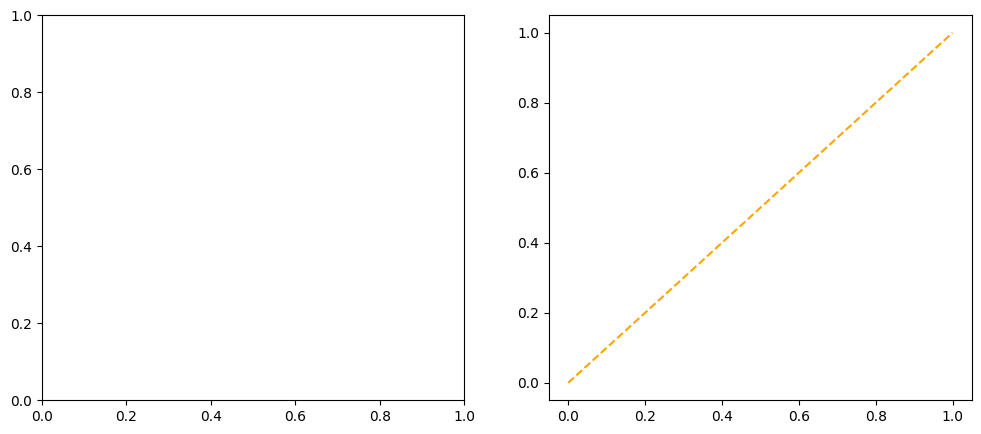

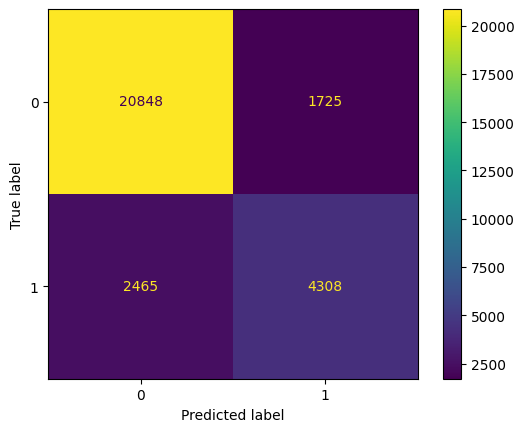

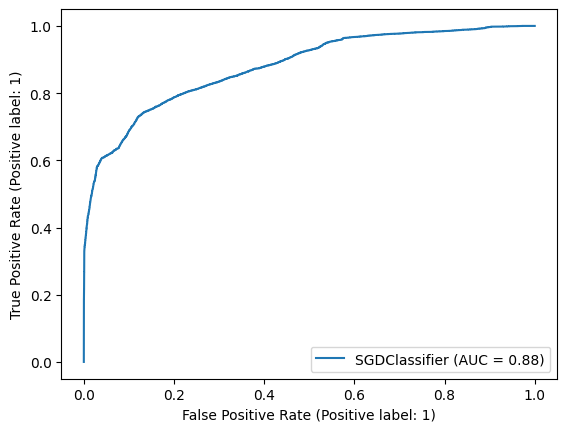

In [84]:
clf_SGDcv_tuned = SGDClassifier(alpha = 0.001, loss = "hinge", max_iter = 1000, penalty = "l1")
clf_SGDcv_tuned.fit(X_train_sm_sc,  y_train_sm)
y_pred = clf_SGDcv_tuned.predict(X_test_sc)
classification(y_test, y_pred, X_test_sc, clf_SGDcv_tuned)

In [85]:
df_results = add_results('SGDClassifier', df_results)
df_results.head()

<ipython-input-58-bb8531220e45>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Model Name': model_name,


,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.68
2,XGBoost,0.72
3,Logistic Regression,0.70
4,SGDClassifier,0.64


# **MODEL 7 - KNN**

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.91      0.84     22573
           1       0.27      0.11      0.16      6773

    accuracy                           0.72     29346
   macro avg       0.52      0.51      0.50     29346
weighted avg       0.66      0.72      0.68     29346

KNN Test Set - Accuracy: 0.7242213589586315
KNN Test Set - Precision: 0.2679324894514768
KNN Test Set - Recall: 0.11250553668979772
KNN Test Set - F1 Score: 0.15846937714463968


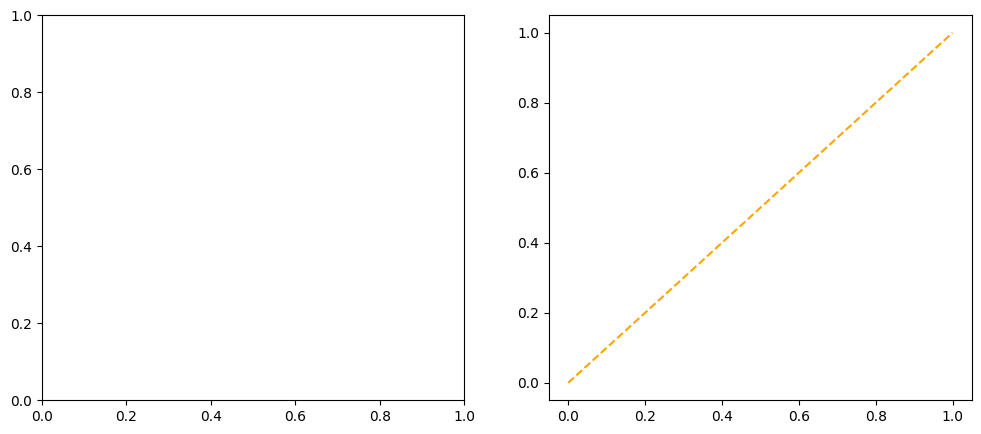

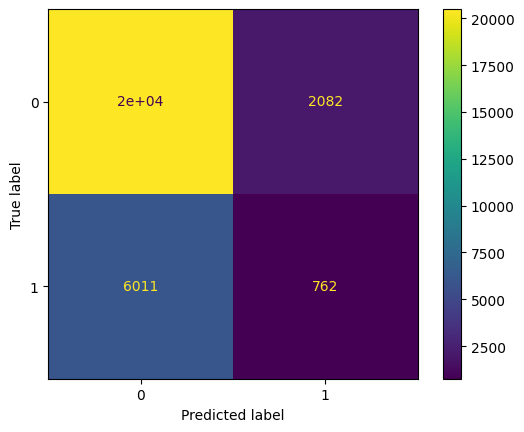

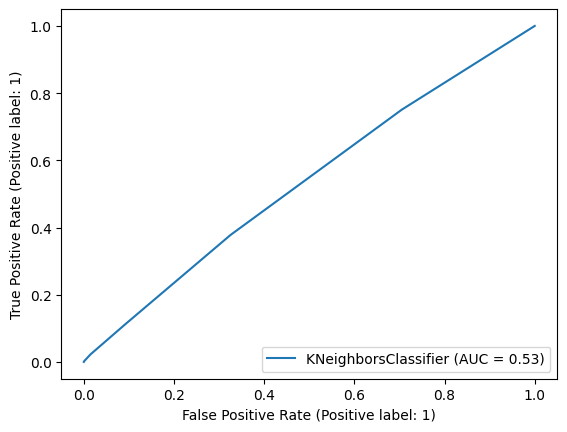

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fitting KNeighborsClassifier to training data and evaluating results
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_knn = knn_classifier.predict(X_test)
y_pred_train_knn = knn_classifier.predict(X_train)

classification(y_test, y_pred_test_knn, X_test, knn_classifier)

#classification(y_test, y_pred_train_knn, X_test, knn_classifier)
# Evaluate on the test set using classification metrics
accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
precision_knn = precision_score(y_test, y_pred_test_knn)
recall_knn = recall_score(y_test, y_pred_test_knn)
f1_knn = f1_score(y_test, y_pred_test_knn)

# Print or store the classification metrics for KNN
print(f'KNN Test Set - Accuracy: {accuracy_knn}')
print(f'KNN Test Set - Precision: {precision_knn}')
print(f'KNN Test Set - Recall: {recall_knn}')
print(f'KNN Test Set - F1 Score: {f1_knn}')


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     22573
           1       0.77      0.65      0.70      6773

    accuracy                           0.87     29346
   macro avg       0.83      0.79      0.81     29346
weighted avg       0.87      0.87      0.87     29346



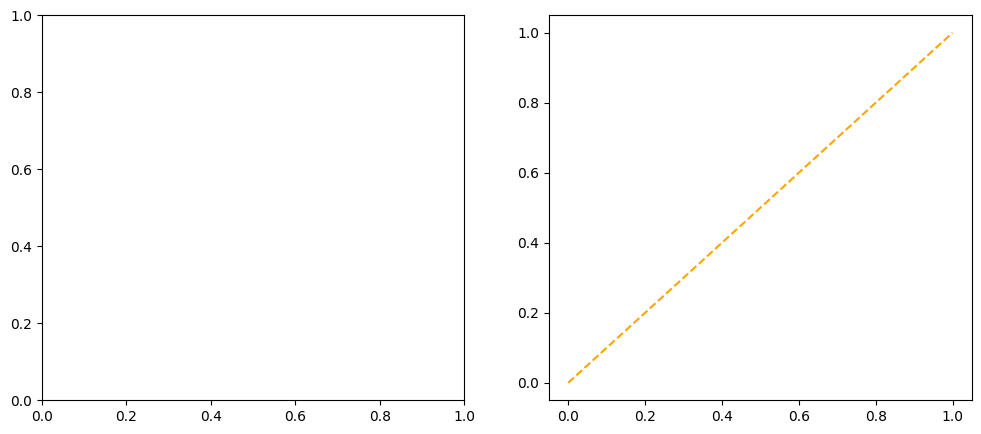

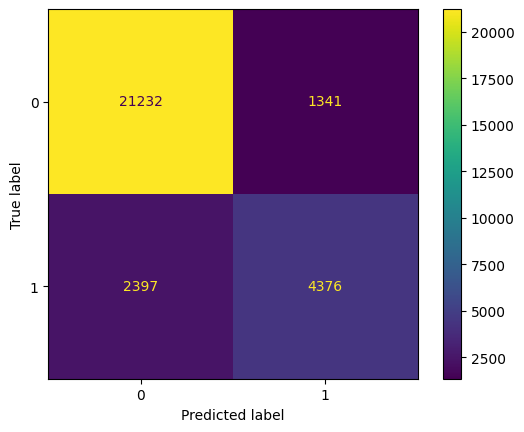

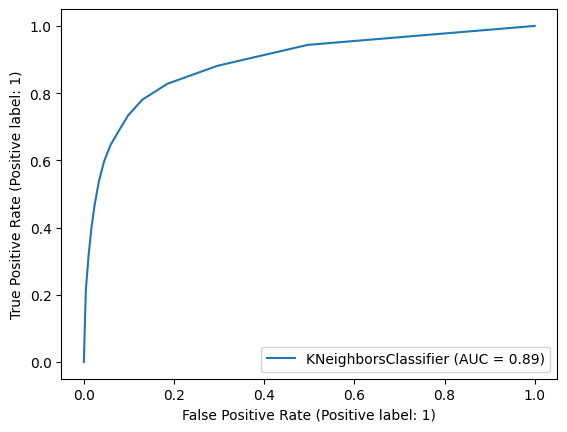

In [88]:
#13 for 54 is best paramater, 5 for 58 is best paramater
clf_knncv_tuned = KNeighborsClassifier(n_neighbors = 13)
clf_knncv_tuned.fit(X_train_sm_sc,  y_train_sm)
y_pred = clf_knncv_tuned.predict(X_test_sc)
classification(y_test, y_pred, X_test_sc, clf_knncv_tuned)

In [89]:
df_results = add_results('KNN Classifier', df_results)
df_results.head()

<ipython-input-58-bb8531220e45>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Model Name': model_name,


,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.68
2,XGBoost,0.72
3,Logistic Regression,0.70
4,SGDClassifier,0.64


# **Model 8 - DNN**

In [90]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the DNN model to training data
dnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Predictions on the test set
y_pred_test_dnn_prob = dnn_model.predict(X_test_scaled)
y_pred_test_dnn = np.round(y_pred_test_dnn_prob)

# Evaluate on the test set using classification metrics
accuracy_dnn = accuracy_score(y_test, y_pred_test_dnn)
precision_dnn = precision_score(y_test, y_pred_test_dnn)
recall_dnn = recall_score(y_test, y_pred_test_dnn)
f1_dnn = f1_score(y_test, y_pred_test_dnn)

# Print or store the classification metrics for the DNN model
print(f'DNN Test Set - Accuracy: {accuracy_dnn}')
print(f'DNN Test Set - Precision: {precision_dnn}')
print(f'DNN Test Set - Recall: {recall_dnn}')
print(f'DNN Test Set - F1 Score: {f1_dnn}')

# Print classification report for additional details
print(classification_report(y_test, y_pred_test_dnn))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_dnn)
print("Confusion Matrix:")
print(conf_matrix)

918/918 [==============================] - 1s 1ms/step
DNN Test Set - Accuracy: 0.8931711306481293
DNN Test Set - Precision: 0.8139454608215395
DNN Test Set - Recall: 0.6962941089620552
DNN Test Set - F1 Score: 0.7505371210312723
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     22573
           1       0.81      0.70      0.75      6773

    accuracy                           0.89     29346
   macro avg       0.86      0.82      0.84     29346
weighted avg       0.89      0.89      0.89     29346

Confusion Matrix:
[[21495  1078]
 [ 2057  4716]]


In [ ]:
df_results = add_results('DNN Classifier', df_results)
df_results.head()

<ipython-input-59-bb8531220e45>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Model Name': model_name,


,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.61
2,XGBoost,0.65
3,Logistic Regression,0.66
4,SGDClassifier,0.62


# iNTERPRET

Now that we have 3 tuned models, we can analyze which attributes they used in predicting whether a song was going to be popular or not and interpret these values. For this we will be looking at feature importances of each model and comparing them against each other to see if we can see any common threads between the models.

## Parsing Feature Importances to Dataframes

### Random Forest

In [ ]:
#accessing feature importance values of the tuned random forest model and sorting them
rf_importances_df = pd.Series(clf_rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
rf_importances_df = rf_importances_df.reset_index()
rf_importances_df.columns = ['RF-Attribute', 'RF-Importance']
rf_importances_df

,RF-Attribute,RF-Importance
0,Pop,0.178062
1,acousticness,0.061443
2,loudness,0.042481
3,instrumentalness,0.034225
4,energy,0.030925
5,speechiness,0.026537
6,danceability,0.025705
7,Reggae,0.025412
8,Ska,0.024940
9,Rock,0.024827


### XGBoost

In [ ]:
#parsing feature importances to a series and sorting
xgb_importances_df = pd.Series(clf_xgb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
xgb_importances_df = xgb_importances_df.reset_index()
xgb_importances_df.columns=['XGB-Attribute', 'XGB-Importance']
xgb_importances_df

,XGB-Attribute,XGB-Importance
0,Pop,0.336572
1,Blues,0.040801
2,Anime,0.040416
3,Ska,0.037048
4,Electronic,0.033622
5,Reggae,0.031296
6,key_F,0.030319
7,time_signature_4/4,0.029968
8,Reggaeton,0.029588
9,World,0.027624


### LogisticRegressionCV

In [ ]:
#accessing feature importance values of the tuned logistic regression model and sorting them
logregcv_importances_df = pd.Series(clf_logregcv_tuned.coef_[0], index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
logregcv_importances_df = logregcv_importances_df.reset_index()
logregcv_importances_df.columns = ['LogReg-Attribute', 'LogReg-Importance']
logregcv_importances_df

,LogReg-Attribute,LogReg-Importance
0,Pop,0.606722
1,Rock,0.308596
2,Rap,0.113423
3,danceability,0.112827
4,loudness,0.105120
5,time_signature_4/4,0.090718
6,Dance,0.058994
7,duration_ms,0.031753
8,Hip-Hop,0.008411
9,speechiness,-0.003395


In [ ]:
#parsing feature importances to a series and sorting
SGD_importances_df = pd.Series(clf_SGDcv_tuned.coef_[0], index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
SGD_importances_df = SGD_importances_df.reset_index()
SGD_importances_df.columns = ['SGD-Attribute', 'SGD-Importance']
SGD_importances_df

,SGD-Attribute,SGD-Importance
0,Pop,0.874099
1,Rock,0.603929
2,Rap,0.024197
3,duration_ms,0.017099
4,time_signature_4/4,0.015817
5,danceability,0.003120
6,loudness,0.001559
7,Dance,0.000000
8,time_signature_1/4,0.000000
9,acousticness,0.000000


In [ ]:
#Concatenating feature importances into a single dataframe
importances_df = pd.concat([rf_importances_df, xgb_importances_df, logregcv_importances_df, SGD_importances_df], axis=1)
importances_df

,RF-Attribute,RF-Importance,XGB-Attribute,XGB-Importance,LogReg-Attribute,LogReg-Importance,SGD-Attribute,SGD-Importance
0,Pop,0.178062,Pop,0.336572,Pop,0.606722,Pop,0.874099
1,acousticness,0.061443,Blues,0.040801,Rock,0.308596,Rock,0.603929
2,loudness,0.042481,Anime,0.040416,Rap,0.113423,Rap,0.024197
3,instrumentalness,0.034225,Ska,0.037048,danceability,0.112827,duration_ms,0.017099
4,energy,0.030925,Electronic,0.033622,loudness,0.105120,time_signature_4/4,0.015817
5,speechiness,0.026537,Reggae,0.031296,time_signature_4/4,0.090718,danceability,0.003120
6,danceability,0.025705,key_F,0.030319,Dance,0.058994,loudness,0.001559
7,Reggae,0.025412,time_signature_4/4,0.029968,duration_ms,0.031753,Dance,0.000000
8,Ska,0.024940,Reggaeton,0.029588,Hip-Hop,0.008411,time_signature_1/4,0.000000
9,Rock,0.024827,World,0.027624,speechiness,-0.003395,acousticness,0.000000


## Feature Importance Comparison

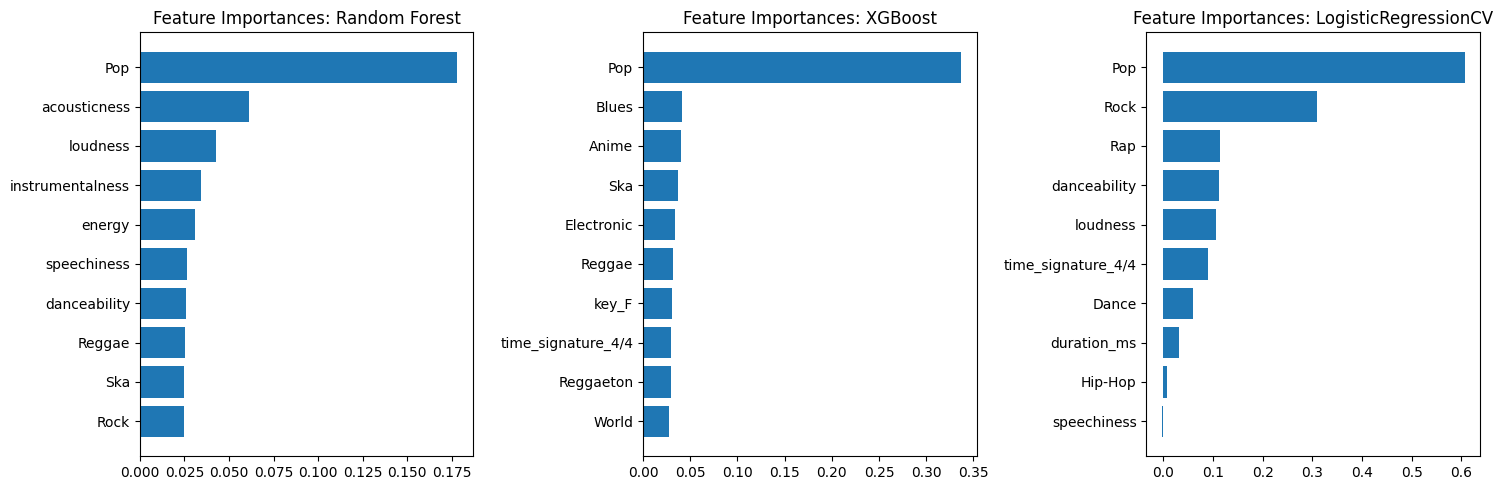

In [ ]:
#plotting feature importances for all models for comparison

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

rf_importances_df = rf_importances_df.sort_values(by='RF-Importance', ascending=True).tail(10)
ax[0].barh(rf_importances_df['RF-Attribute'], rf_importances_df['RF-Importance'])
ax[0].set_title('Feature Importances: Random Forest')

xgb_importances_df = xgb_importances_df.sort_values(by='XGB-Importance', ascending=True).tail(10)
ax[1].barh(xgb_importances_df['XGB-Attribute'], xgb_importances_df['XGB-Importance'])
ax[1].set_title('Feature Importances: XGBoost')

logregcv_importances_df = logregcv_importances_df.sort_values(by='LogReg-Importance', ascending=True).tail(10)
ax[2].barh(logregcv_importances_df['LogReg-Attribute'], logregcv_importances_df['LogReg-Importance'])
ax[2].set_title('Feature Importances: LogisticRegressionCV')
plt.tight_layout()

Among the 3 models we built we can see that Genre of a song has the highest effect on the popularity of a song. On all 3 models, a song having Pop as its genre had the most impact on its popularity. This makes sense since Pop songs by nature are considered popular. Among the rest of the features shown above, different attribute scores such as danceability, energy, different genres and acousticness play a major role. Next, we can inspect the full gamut of the feature importances for logistic regression for reference.

<BarContainer object of 52 artists>

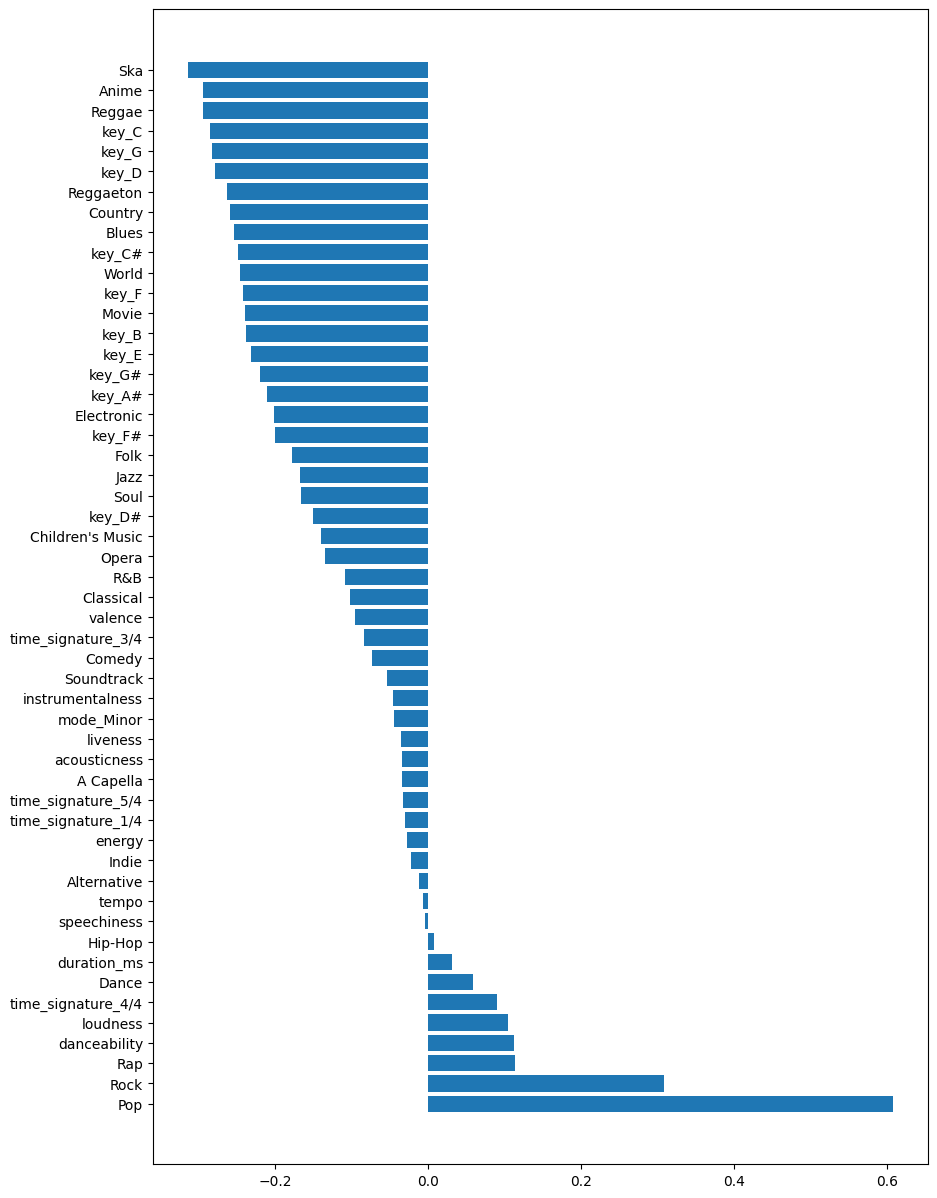

In [ ]:
logregcv_importances_df = pd.Series(clf_logregcv_tuned.coef_[0], index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
logregcv_importances_df = logregcv_importances_df.reset_index()
logregcv_importances_df.columns = ['Attribute', 'Importance']

fig, ax = plt.subplots(figsize=(10,15))
ax.barh(logregcv_importances_df['Attribute'], logregcv_importances_df['Importance'])

We can see here that while certain features like 'Pop', 'Rock' and 'danceability' positively affected the prediction, other features such as 'Ska', 'Anime' and 'key_G' negatively affected it. Next we can dive into our processed dataframe and explore some of these attributes for popular and unpopular songs to come to conclusions.

## Data Visualizations

### Genre

In [ ]:
#separating popular and unpopular songs to two dfs
popular_songs_df = df_ohe[df_ohe['is_popular'] == 1]
unpopular_songs_df = df_ohe[df_ohe['is_popular']==0]

In [ ]:
#checking for genre occurence counts for popular songs
popular_genre_df = popular_songs_df.iloc[:, 10:36].agg('sum').sort_values(ascending=False).reset_index()
popular_genre_df.columns = ['genre', 'count']
popular_genre_df

,genre,count
0,Pop,8845
1,Rap,5440
2,Rock,5332
3,Hip-Hop,4483
4,Dance,4151
5,Indie,3096
6,Children's Music,3079
7,Alternative,2713
8,R&B,2347
9,Folk,1658


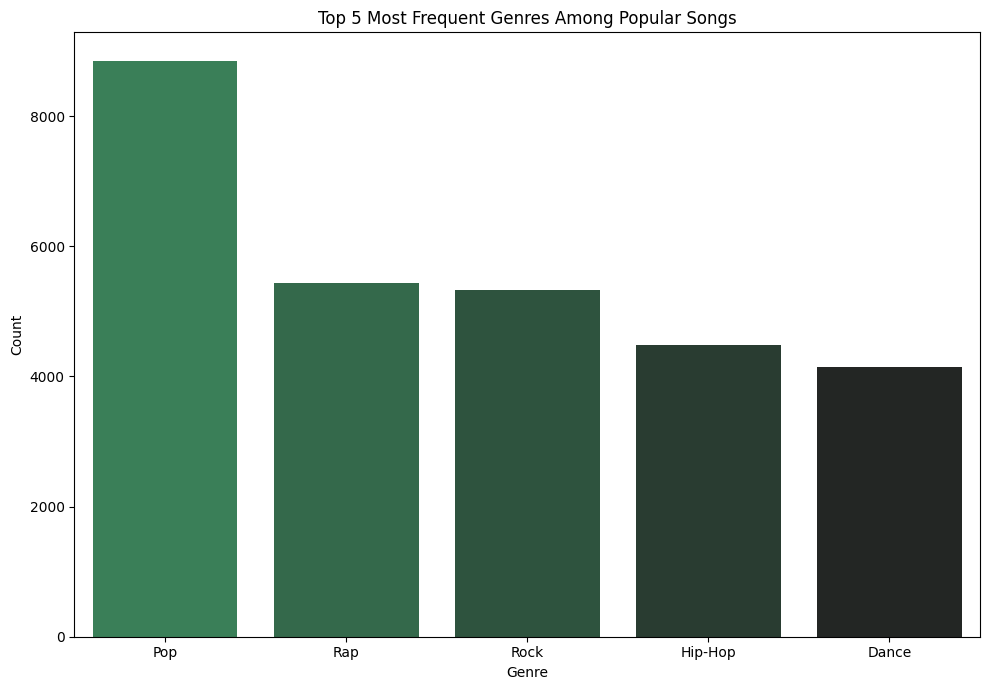

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=popular_genre_df['genre'].head(5), y=popular_genre_df['count'].head(5),
           palette='dark:seagreen_r')

ax=plt.gca()
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Top 5 Most Frequent Genres Among Popular Songs')
plt.tight_layout();
# plt.savefig('images/genre-popular.jpg')

Above bar graph shows us the most frequent genres among popular songs. As we discussed above, most popular songs have Pop as their genre followed by Rap, Rock, Hip-Hop and Dance. These results make sense and are in-line with a survey conducted by IFPI (https://www.statista.com/chart/15763/most-popular-music-genres-worldwide/).

In [ ]:
#checking for genre occurence counts for unpopular songs
unpopular_genre_df = unpopular_songs_df.iloc[:, 10:36].agg('sum').sort_values(ascending=False).reset_index()
unpopular_genre_df.columns = ['genre', 'count']
unpopular_genre_df

,genre,count
0,Children's Music,11677
1,Comedy,9680
2,Soundtrack,9544
3,Classical,9169
4,Jazz,9073
5,Electronic,9044
6,Anime,8901
7,World,8875
8,Ska,8754
9,Blues,8625


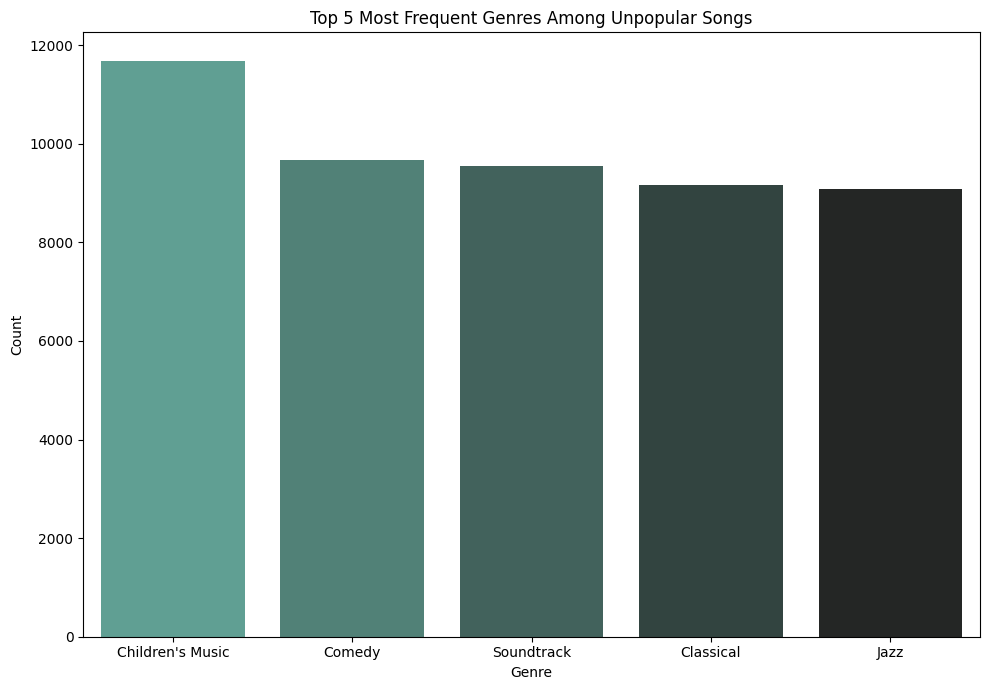

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=unpopular_genre_df['genre'].head(5), y=unpopular_genre_df['count'].head(5),
           palette='dark:#5A9_r')

ax=plt.gca()
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Top 5 Most Frequent Genres Among Unpopular Songs')
plt.tight_layout();
# plt.savefig('images/genre-unpopular.jpg')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='center');

The most frequent genres of unpopular songs can be seen above. The results make sense as these genres tend to have a more niche fanbase or as in the case of "Children's Music" are listened to infrequently.

In [ ]:
#displaying percentages for each genre
popular_genre_df['count']=popular_genre_df['count']/popular_genre_df['count'].sum()
popular_genre_df

,genre,count
0,Pop,0.190971
1,Rap,0.117454
2,Rock,0.115122
3,Hip-Hop,0.096792
4,Dance,0.089623
5,Indie,0.066845
6,Children's Music,0.066478
7,Alternative,0.058576
8,R&B,0.050674
9,Folk,0.035798


In [ ]:
#displaying percentages for each genre
unpopular_genre_df['count']=unpopular_genre_df['count']/unpopular_genre_df['count'].sum()
unpopular_genre_df

,genre,count
0,Children's Music,0.062642
1,Comedy,0.051929
2,Soundtrack,0.051199
3,Classical,0.049188
4,Jazz,0.048673
5,Electronic,0.048517
6,Anime,0.047750
7,World,0.047610
8,Ska,0.046961
9,Blues,0.046269


### Energy

In [ ]:
#removing outliers from energy scores and separating them to Series for popular and unpopular songs
popular_energy_clean = popular_songs_df[find_outliers_IQR(popular_songs_df['energy'])==False]
print(popular_energy_clean['energy'].describe())

unpopular_energy_clean = unpopular_songs_df[find_outliers_IQR(unpopular_songs_df['energy'])==False]
print(unpopular_energy_clean['energy'].describe())

count    20040.000000
mean         0.642509
std          0.195809
min          0.074000
25%          0.511000
50%          0.662000
75%          0.796000
max          0.999000
Name: energy, dtype: float64
count    156575.000000
mean          0.546617
std           0.282264
min           0.000020
25%           0.318000
50%           0.578000
75%           0.788000
max           0.999000
Name: energy, dtype: float64


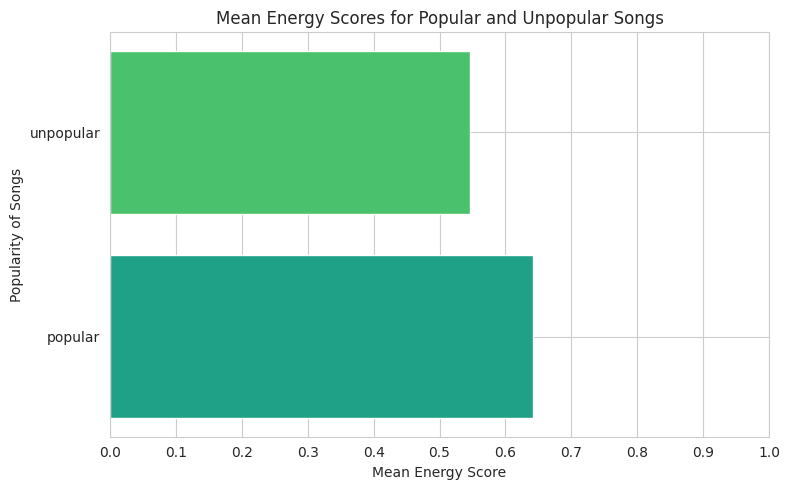

In [ ]:
import numpy as np

#storing mean energy scores in dict
mean_energy = {'popular': popular_energy_clean['energy'].mean(),
                     'unpopular': unpopular_energy_clean['energy'].mean()}
#visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_energy.keys()),
            width=list(mean_energy.values()),
            color=[sns.color_palette('viridis')[3],sns.color_palette('viridis')[4]])
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Energy Score')
    ax.set_title('Mean Energy Scores for Popular and Unpopular Songs')
    plt.tight_layout()
    plt.savefig('images/energy.jpg')

As we can see above, popular songs tended to be more energetic compared to unpopular songs. This makes sense since the most frequent genres we explored tend to also be energetic genres.

### Danceability

In [ ]:
print('Median Danceability Scores')
print('-------------------')
print(f"Unpopular Songs: {round(unpopular_songs_df['danceability'].median(),2)}")
print(f"Popular Songs: {round(popular_songs_df['danceability'].median(),2)}")

Median Danceability Scores
-------------------
Unpopular Songs: 0.55
Popular Songs: 0.63


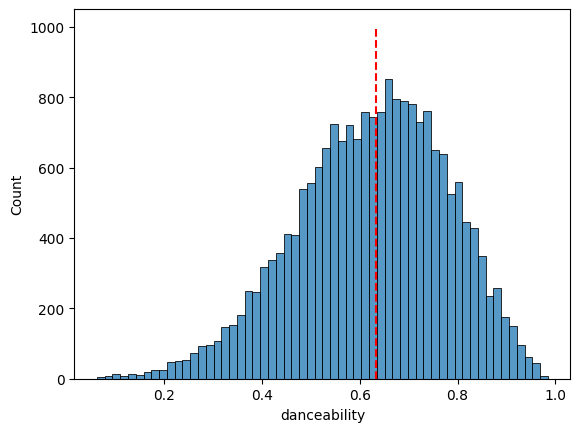

In [ ]:
sns.histplot(data = popular_songs_df, x='danceability', bins='auto')
plt.vlines(x=popular_songs_df['danceability'].median(), ymin=0, ymax=1000, color='red', ls='--')

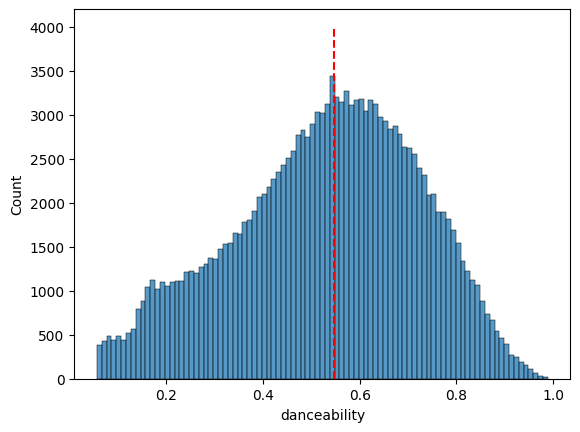

In [ ]:
sns.histplot(data = unpopular_songs_df, x='danceability', bins='auto')
plt.vlines(x=unpopular_songs_df['danceability'].median(), ymin=0, ymax=4000, color='red', ls='--')

In [ ]:
#removing outliers from danceability scores and separating them to Series for popular and unpopular songs
popular_dance_clean = popular_songs_df[find_outliers_IQR(popular_songs_df['danceability'])==False]
print(popular_dance_clean['danceability'].describe())

unpopular_dance_clean = unpopular_songs_df[find_outliers_IQR(unpopular_songs_df['danceability'])==False]
print(unpopular_dance_clean['danceability'].describe())

count    20094.000000
mean         0.625974
std          0.151130
min          0.196000
25%          0.523000
50%          0.636000
75%          0.738000
max          0.985000
Name: danceability, dtype: float64
count    156575.000000
mean          0.530440
std           0.191956
min           0.056900
25%           0.401000
50%           0.547000
75%           0.674000
max           0.989000
Name: danceability, dtype: float64


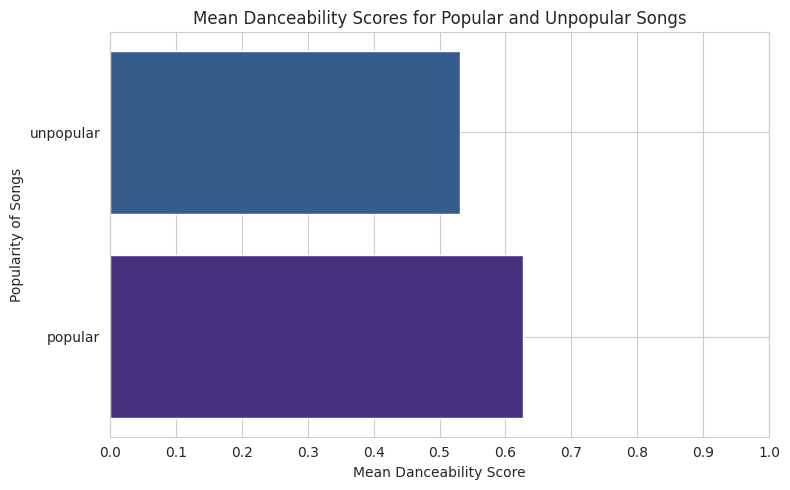

In [ ]:
#storing mean danceability scores in dict
mean_danceability = {'popular': popular_dance_clean['danceability'].mean(),
                     'unpopular': unpopular_dance_clean['danceability'].mean()}

#visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_danceability.keys()),
            width=list(mean_danceability.values()),
            color=[sns.color_palette('viridis')[0],sns.color_palette('viridis')[1]])
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Danceability Score')
    ax.set_title('Mean Danceability Scores for Popular and Unpopular Songs')
    plt.tight_layout();
    plt.savefig('images/danceability.jpg')

Above, it is clear that the popular songs tended to have a higher danceability score compared to unpopular songs. This follows the same trend as the energy scores where majority of the popular songs are high energy and danceable (refer to Appendix A for definition of "danceability": high tempo, high beat strength etc.)

### Acousticness

In [ ]:
#removing outliers from danceability scores and separating them to Series for popular and unpopular songs
popular_acoustic_clean = popular_songs_df[find_outliers_IQR(popular_songs_df['acousticness'])==False]
print(popular_acoustic_clean['acousticness'].describe())

unpopular_acoustic_clean = unpopular_songs_df[find_outliers_IQR(unpopular_songs_df['acousticness'])==False]
print(unpopular_acoustic_clean['acousticness'].describe())

count    19715.000000
mean         0.226220
std          0.248585
min          0.000002
25%          0.026400
50%          0.125000
75%          0.355000
max          0.913000
Name: acousticness, dtype: float64
count    156575.000000
mean          0.424829
std           0.371949
min           0.000000
25%           0.049800
50%           0.329000
75%           0.819000
max           0.996000
Name: acousticness, dtype: float64


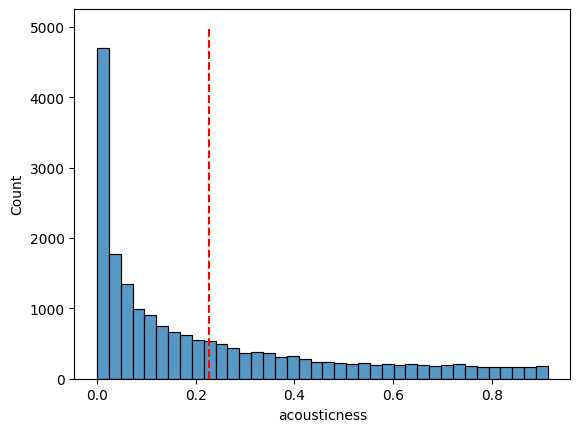

In [ ]:
sns.histplot(data = popular_acoustic_clean, x='acousticness', bins='auto')
plt.vlines(x=popular_acoustic_clean['acousticness'].mean(), ymin=0, ymax=5000, color='red', ls='--')

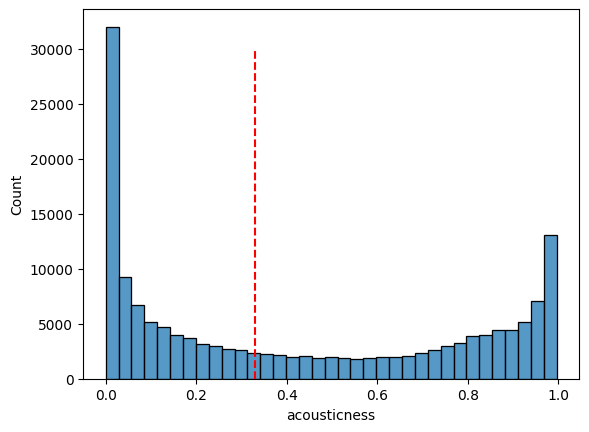

In [ ]:
sns.histplot(data = unpopular_songs_df, x='acousticness', bins='auto')
plt.vlines(x=unpopular_songs_df['acousticness'].median(), ymin=0, ymax=30000, color='red', ls='--')

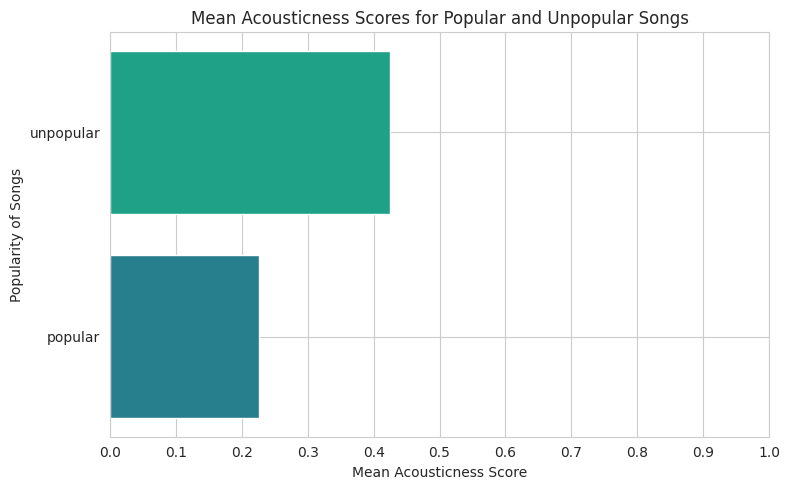

In [ ]:
#storing mean acousticness scores in dict
mean_acousticness = {'popular': popular_acoustic_clean['acousticness'].mean(),
                     'unpopular': unpopular_acoustic_clean['acousticness'].mean()}

#visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_acousticness.keys()),
            width=list(mean_acousticness.values()),
            color=[sns.color_palette('viridis')[2],sns.color_palette('viridis')[3]])
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Acousticness Score')
    ax.set_title('Mean Acousticness Scores for Popular and Unpopular Songs')
    plt.tight_layout();
    plt.savefig('images/acousticness.jpg')

Similar to the energy and danceability scores we see that the popular songs tended to have a lower acousticness score. Since acoustic songs are usually lower energy and rarely danceable this follows the same trend we've been observing.

# CONCLUSIONS & RECOMMENDATIONS

## Best Model Results

In [ ]:
df_results.sort_values(by='Recall Score', ascending=False)

,Model Name,Recall Score
3,Logistic Regression,0.66
2,XGBoost,0.65
4,SGDClassifier,0.62
1,Random Forest,0.61
5,KNN Classifier,0.58
6,DNN Classifier,0.58
0,Dummy Classifier,0.00


Out of the 3 models, the Logistic Regression model was the best one in identifying popular songs. It had a 66% recall score for identifying popular songs compared to 51% by the baseline Dummy Classifier model. The closest rival was the XGBoost model at 65%. Even though XGBoost fell short in this regard, we consider the XGBoost as the best overall model since it had 4% higher recall score in identifying unpopular songs compared to the Logistic Regression model. Since this project was focused on identifying popular songs, Logistic Regression wins.

## Takeaways

In a competitive environment like the music streaming market, it is vital to retain current subscribers and add new subscribers over time. By accurately predicting which song will be popular next, companies like Spotify can leverage this information to create better playlists and find and sign exclusivity deals with established and up-and-coming artists more easily.  To sum up, our analysis of approximately 176,000 songs from 2019 showed the following:

- Popular songs tend to have Pop, Rap, Rock, Hip-Hop and Dance as their genres.
- More niche genres such as Children's Music, Comedy, Soundtracks, Classical and Jazz tend to be unpopular.
- Generally, popular songs are higher energy, danceable, and therefore less acoustic.

## Recommendations

Our recommendations to Spotify for leveraging this information would be the following:

- By identifying the next popular songs, Spotify can reach out to these artists and sign exclusivity deals with them to make their soon-to-be popular music available only on Spotify's platform. This would also help in identifying up-and-coming artists and may provide additional opportunities in the future.

- Furthermore, Spotify can work with these artists on additional exclusive content such as song commentary or behind the scenes recordings.

- Spotify can also curate even better playlists for their current subscribers by finding "fresh hits" ahead of the competition and use this to market the platform to new subscribers.

We think that by utilizing our model and the insights we've highlighted, Spotify will stay competitive in the music streaming market for years to come.